# Importing the modules

In [253]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
import warnings

In [254]:
import warnings

warnings.filterwarnings("ignore")

# Importing the models

In [256]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [257]:
#df = pd.read_csv("Users\DINESH SHARMA\Desktop\Obfuscated-MalMem2022.csv")

In [258]:
df1 = pd.read_csv("C:\\Users\\DINESH SHARMA\Desktop\\ICMP Jornal and Notebook fig\\ICMP ATTACK DATASET.csv")

In [259]:
df=df1

In [260]:
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.217.167.4-172.17.237.22-443-39168-6,172.17.237.22,39168.0,172.217.167.4,443.0,6.0,22-12-2021 19:56,10301270.0,5.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDOS
1,172.217.167.4-172.17.237.22-443-39170-6,172.17.237.22,39170.0,172.217.167.4,443.0,6.0,22-12-2021 19:56,13284978.0,5.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDOS
2,172.217.167.4-172.17.237.22-443-39170-6,172.17.237.22,39170.0,172.217.167.4,443.0,6.0,22-12-2021 19:56,169055.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDOS
3,172.17.237.22-8.8.8.8-44264-53-17,172.17.237.22,44264.0,8.8.8.8,53.0,17.0,22-12-2021 19:56,63565.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDOS
4,172.17.237.22-216.239.32.3-36943-443-17,172.17.237.22,36943.0,216.239.32.3,443.0,17.0,22-12-2021 19:57,1611997.0,13.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDOS


In [261]:
df.tail()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
85058,172.17.237.22-180.149.59.14-41818-80-6,172.17.237.22,41818.0,180.149.59.14,80.0,6.0,22-12-2021 16:45,90111934.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,45100000.0,79.195959,45100000.0,45100000.0,NORMAL
85059,172.17.237.22-180.149.59.12-52106-80-6,172.17.237.22,52106.0,180.149.59.12,80.0,6.0,22-12-2021 16:45,90111800.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,45100000.0,42.426407,45100000.0,45100000.0,NORMAL
85060,172.17.237.22-180.149.59.13-58392-80-6,172.17.237.22,58392.0,180.149.59.13,80.0,6.0,22-12-2021 16:45,90112129.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,45100000.0,5588.264892,45100000.0,45100000.0,NORMAL
85061,142.250.182.174-172.17.237.22-80-60850-6,172.17.237.22,60850.0,142.250.182.174,80.0,6.0,22-12-2021 16:45,90112126.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,45100000.0,5564.930368,45100000.0,45100000.0,NORMAL
85062,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [262]:
df.shape

(85063, 84)

In [263]:
df.isnull().sum()

Flow ID      0
Src IP       1
Src Port     1
Dst IP       1
Dst Port     1
            ..
Idle Mean    1
Idle Std     1
Idle Max     1
Idle Min     1
Label        1
Length: 84, dtype: int64

In [264]:
df.keys()

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE 

In [265]:
df=df.dropna()

In [266]:
df.shape

(85045, 84)

In [267]:
df['Label'].value_counts()

Label
DDOS      65602
NORMAL    19443
Name: count, dtype: int64

In [268]:
unique_classes = df['Label'].unique()  # Replace `correlated_data` with your DataFrame name
print("Unique classes under 'Label':")
for class_name in unique_classes:
    print(class_name)

Unique classes under 'Label':
DDOS
NORMAL


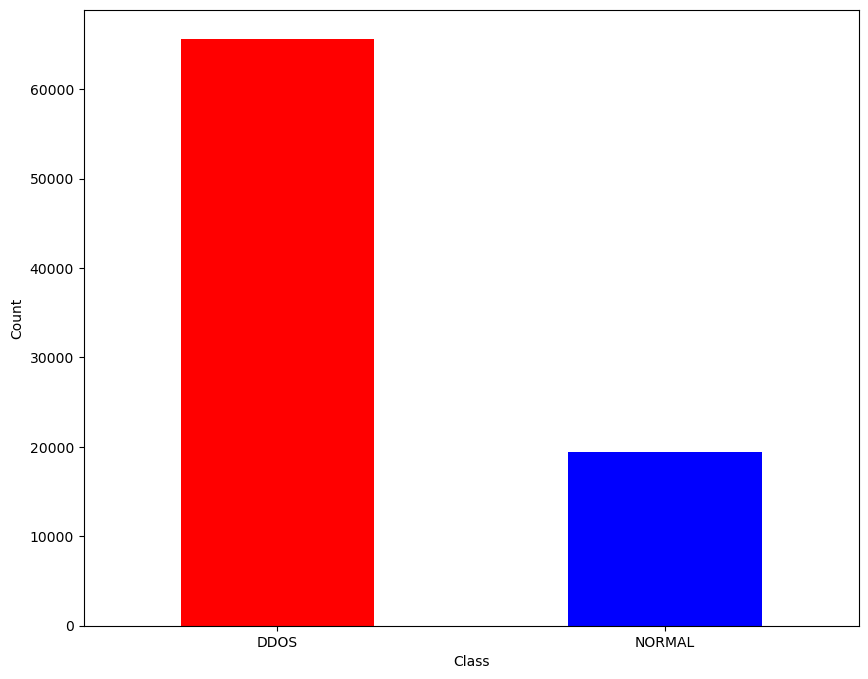

In [269]:
#Graphical Representation of count value of class column
plt.figure(figsize=(10, 8))
color = ['r','b']
df['Label'].value_counts().plot(kind='bar',color =color)
plt.xlabel("Class")
plt.xticks(rotation=0)
plt.ylabel("Count")
#plt.title("Class Count Graph")
plt.savefig("dataset.png",dpi = 300)
plt.show()

In [270]:
df = df.drop(columns = ['Timestamp','Flow ID','Src IP','Dst IP'])
df.head()

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,39168.0,443.0,6.0,10301270.0,5.0,7.0,517.0,4409.0,517.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDOS
1,39170.0,443.0,6.0,13284978.0,5.0,7.0,517.0,4411.0,517.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDOS
2,39170.0,443.0,6.0,169055.0,1.0,2.0,74.0,0.0,74.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDOS
3,44264.0,53.0,17.0,63565.0,0.0,2.0,0.0,137.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDOS
4,36943.0,443.0,17.0,1611997.0,13.0,19.0,5379.0,8967.0,1250.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDOS


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85045 entries, 0 to 85061
Data columns (total 80 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Src Port           85045 non-null  float64
 1   Dst Port           85045 non-null  float64
 2   Protocol           85045 non-null  float64
 3   Flow Duration      85045 non-null  float64
 4   Tot Fwd Pkts       85045 non-null  float64
 5   Tot Bwd Pkts       85045 non-null  float64
 6   TotLen Fwd Pkts    85045 non-null  float64
 7   TotLen Bwd Pkts    85045 non-null  float64
 8   Fwd Pkt Len Max    85045 non-null  float64
 9   Fwd Pkt Len Min    85045 non-null  float64
 10  Fwd Pkt Len Mean   85045 non-null  float64
 11  Fwd Pkt Len Std    85045 non-null  float64
 12  Bwd Pkt Len Max    85045 non-null  float64
 13  Bwd Pkt Len Min    85045 non-null  float64
 14  Bwd Pkt Len Mean   85045 non-null  float64
 15  Bwd Pkt Len Std    85045 non-null  float64
 16  Flow Byts/s        85045 no

In [272]:
df.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,85045.000000,85045.000000,85045.000000,8.504500e+04,8.504500e+04,8.504500e+04,85045.000000,8.504500e+04,85045.000000,85045.000000,...,85045.000000,85045.0,8.504500e+04,8.504500e+04,8.504500e+04,8.504500e+04,8.504500e+04,8.504500e+04,8.504500e+04,8.504500e+04
mean,34393.680734,1462.489423,7.097854,2.764108e+07,3.191596e+01,4.059845e+01,447.068881,1.295349e+04,78.616309,4.670998,...,2.092575,0.0,9.905939e+04,4.364536e+04,1.471881e+05,6.610734e+04,1.772649e+06,3.688568e+05,2.116426e+06,1.463987e+06
std,19159.461856,7918.059948,3.329374,1.759687e+07,3.971413e+03,3.976392e+03,7757.609421,2.717037e+05,395.218197,29.961122,...,28.987038,0.0,1.016693e+06,5.346384e+05,1.391668e+06,8.875767e+05,8.012186e+06,2.643559e+06,9.426018e+06,7.245247e+06
min,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,18065.000000,0.000000,6.000000,2.973724e+07,9.000000e+00,1.100000e+01,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,37002.000000,0.000000,6.000000,2.980569e+07,9.000000e+00,1.100000e+01,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,50770.000000,0.000000,6.000000,2.981786e+07,9.000000e+00,1.100000e+01,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65535.000000,60980.000000,17.000000,1.200000e+08,1.019177e+06,1.019179e+06,864775.000000,1.540000e+07,17520.000000,1472.000000,...,1974.000000,0.0,1.080000e+08,5.600000e+07,1.080000e+08,1.080000e+08,1.200000e+08,7.330000e+07,1.200000e+08,1.200000e+08


# Label Encoder

In [274]:
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])
df.head()

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,39168.0,443.0,6.0,10301270.0,5.0,7.0,517.0,4409.0,517.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,39170.0,443.0,6.0,13284978.0,5.0,7.0,517.0,4411.0,517.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,39170.0,443.0,6.0,169055.0,1.0,2.0,74.0,0.0,74.0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,44264.0,53.0,17.0,63565.0,0.0,2.0,0.0,137.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,36943.0,443.0,17.0,1611997.0,13.0,19.0,5379.0,8967.0,1250.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [275]:
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)
cormat = df.corr()
cormat = cormat.dropna(how = 'all', axis=1)
cormat = cormat.dropna(how = 'all', axis=0)
cormat.style.background_gradient(cmap='coolwarm')

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Bwd PSH Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
Src Port,1.000000,-0.287051,0.196006,-0.017942,-0.009085,-0.008021,0.035079,0.029646,0.126314,0.080937,0.120697,0.121977,0.163764,0.108473,0.165792,0.169571,-0.012095,-0.124591,-0.002520,0.034602,0.065600,-0.001039,-0.030104,0.000629,0.052215,0.057729,-0.018214,0.017483,0.029354,0.104577,0.118932,0.017558,0.034522,0.027509,0.030720,-0.060698,-0.172607,0.123348,0.163033,0.179361,0.172875,0.116594,-0.189618,0.146303,0.008387,0.034522,-0.075495,0.013124,0.188970,0.120697,0.165792,-0.009085,0.035079,-0.008021,0.029644,0.025263,0.041809,0.008231,0.019477,0.017241,0.000870,0.087772,0.006610,0.067376,0.090953,0.155813
Dst Port,-0.287051,1.000000,-0.021908,-0.253924,-0.001390,-0.001612,-0.005693,-0.006106,-0.018170,0.023070,-0.002712,-0.017143,-0.028302,0.012102,-0.024822,-0.029750,0.041808,0.406183,-0.067406,-0.087911,-0.071044,0.012088,-0.248014,-0.123111,-0.015948,-0.074767,-0.131330,-0.271806,-0.162126,-0.061730,-0.084392,-0.004165,0.037863,-0.034472,-0.020093,0.198822,0.561843,0.003455,-0.027151,-0.022397,-0.028592,-0.016602,0.733042,-0.029410,-0.002024,0.037863,0.587322,-0.296742,-0.021895,-0.002712,-0.024822,-0.001390,-0.005693,-0.001612,-0.006105,0.057859,-0.004709,-0.006816,-0.008026,-0.008384,-0.004153,-0.013769,-0.010525,-0.014818,-0.012660,0.338775
Protocol,0.196006,-0.021908,1.000000,-0.364913,-0.010803,-0.006040,0.080010,0.098773,0.120600,0.461527,0.225255,0.081115,0.125800,0.658091,0.302554,0.141278,0.005229,-0.023402,-0.076498,-0.104959,-0.048894,0.044743,-0.354356,-0.205364,0.027488,-0.063980,-0.241108,-0.442450,-0.289102,-0.103567,-0.123027,0.048119,-0.024999,-0.021389,0.062209,-0.010999,-0.032796,0.676461,0.104864,0.394891,0.159265,0.047824,-0.065646,-0.075441,-0.005182,-0.024999,-0.094820,-0.390207,0.451885,0.225255,0.302554,-0.010803,0.080010,-0.006040,0.098760,-0.027325,0.171366,0.073632,0.064046,0.092020,0.051356,0.022193,0.054380,0.043234,0.010669,0.603098
Flow Duration,-0.017942,-0.253924,-0.364913,1.000000,0.008848,0.013025,0.109754,0.112516,0.168605,-0.107734,0.094565,0.160163,0.126864,-0.207400,0.028950,0.067036,-0.015187,-0.117197,0.444934,0.649564,0.732467,0.075081,0.937400,0.606597,0.588899,0.751453,0.373798,0.886405,0.586591,0.590439,0.678035,-0.003940,0.230272,0.150926,0.147731,-0.057945,-0.161571,-0.232561,0.167964,0.034189,0.119754,0.127561,-0.295802,0.115461,-0.024686,0.230272,-0.070374,0.404679,-0.000258,0.094565,0.028950,0.008848,0.109754,0.013025,0.112503,0.037960,0.126423,0.219962,0.300801,0.295684,0.113308,0.649527,0.482885,0.685093,0.564790,-0.225520
Tot Fwd Pkts,-0.009085,-0.001390,-0.010803,0.008848,1.000000,0.999054,0.003900,0.010275,0.001536,-0.000668,-0.000339,0.000050,0.002120,-0.001339,0.003894,0.000647,-0.000017,0.001870,-0.003437,-0.003434,-0.001393,-0.000579,0.011020,-0.004852,-0.000707,-0.001216,-0.004891,0.009498,-0.005764,-0.002326,-0.001202,-0.000208,-0.000210,0.011127,0.010859,0.002137,0.001446,-0.001375,0.001911,0.003727,0.001776,0.002336,-0.001586,0.000357,-0.000121,-0.000210,-0.002060,0.004837,0.003341,-0.000339,0.003894,1.000000,0.003900,0.999054,0.010276,-0.000058,0.007264,0.003588,0.003666,0.004527,0.002360,0.000300

In [276]:
cormat.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,...,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,0.059131,0.020063,0.062660,0.200120,0.061739,0.066907,0.147025,0.146433,0.257475,0.085175,...,0.151553,0.166406,0.160645,0.191902,0.116609,0.302500,0.200153,0.308690,0.272280,0.214492
std,0.148880,0.213864,0.246437,0.315760,0.240063,0.239057,0.204504,0.244057,0.275744,0.222017,...,0.221556,0.206494,0.177153,0.211783,0.184913,0.288369,0.207943,0.290221,0.270083,0.246391
min,-0.287051,-0.296742,-0.442450,-0.364913,-0.010803,-0.008021,-0.046541,-0.045062,-0.158948,-0.217435,...,-0.057771,-0.070310,-0.063832,-0.078782,-0.072631,-0.039479,-0.042333,-0.040813,-0.035183,-0.391764
25%,0.000689,-0.029206,-0.031428,0.008848,-0.001078,-0.000235,0.008346,0.003139,0.014261,-0.011303,...,0.007264,0.008502,0.012451,0.014761,0.003777,0.069356,0.050186,0.072270,0.058551,0.072754
50%,0.034522,-0.011592,0.035361,0.114384,0.000424,0.001796,0.089864,0.055000,0.170446,0.030328,...,0.071304,0.174357,0.166143,0.197466,0.094033,0.240944,0.166037,0.255119,0.217882,0.187486
75%,0.120256,-0.001445,0.116666,0.396959,0.003894,0.014060,0.232723,0.157841,0.368394,0.079863,...,0.177951,0.229070,0.247051,0.289425,0.157387,0.449662,0.269761,0.448839,0.402882,0.371319
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# function for final dataset

In [278]:
def getCorrelationFeature(corrdata,threshold):
    feature=[]
    value=[]
    for i,index in enumerate(corrdata.index):
        if abs(corrdata[index])>threshold:
            feature.append(index)
            value.append(corrdata[index])
    df=pd.DataFrame(data=value,index=feature,columns=['corr values'])
    return df

In [279]:
threshold=0.40
corr_value=getCorrelationFeature(cormat['Label'],threshold)
corr_value

,corr values
Protocol,0.603098
Bwd Pkt Len Max,0.475832
Bwd Pkt Len Min,0.405274
Bwd Pkt Len Mean,0.496963
Bwd Pkt Len Std,0.488018
Pkt Len Min,0.414263
Pkt Len Max,0.469885
Pkt Len Mean,0.545784
Pkt Len Std,0.501338
SYN Flag Cnt,0.419342


In [280]:
correlated_data=df[corr_value.index]
correlated_data.head()

,Protocol,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,SYN Flag Cnt,ACK Flag Cnt,Pkt Size Avg,Bwd Seg Size Avg,Idle Mean,Idle Max,Label
0,6.0,2860.0,0.0,629.857143,1121.166123,0.0,2860.0,378.923077,852.439388,1.0,0.0,410.500000,629.857143,0.0,0.0,0
1,6.0,1521.0,0.0,630.142857,786.382101,0.0,1521.0,379.076923,638.301060,1.0,0.0,410.666667,630.142857,0.0,0.0,0
2,6.0,0.0,0.0,0.000000,0.000000,0.0,74.0,18.500000,37.000000,0.0,1.0,24.666667,0.000000,0.0,0.0,0
3,17.0,93.0,44.0,68.500000,34.648232,44.0,93.0,60.333333,28.290163,0.0,0.0,90.500000,68.500000,0.0,0.0,0
4,17.0,1250.0,25.0,471.947368,526.736543,25.0,1250.0,472.606061,535.845298,0.0,0.0,487.375000,471.947368,0.0,0.0,0


In [281]:
correlated_data.shape

(85045, 16)

In [282]:
cr = correlated_data.corr()
cr.style.background_gradient(cmap='coolwarm')

,Protocol,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,SYN Flag Cnt,ACK Flag Cnt,Pkt Size Avg,Bwd Seg Size Avg,Idle Mean,Idle Max,Label
Protocol,1.000000,0.125800,0.658091,0.302554,0.141278,0.676461,0.104864,0.394891,0.159265,-0.075441,-0.094820,0.451885,0.302554,0.022193,0.043234,0.603098
Bwd Pkt Len Max,0.125800,1.000000,0.047749,0.855073,0.952768,0.046783,0.925988,0.803261,0.917292,0.789440,-0.032886,0.789540,0.855073,0.438495,0.431295,0.475832
Bwd Pkt Len Min,0.658091,0.047749,1.000000,0.199627,0.005766,0.971082,0.038311,0.286219,0.016924,-0.050895,-0.059931,0.352463,0.199627,0.038998,0.067381,0.405274
Bwd Pkt Len Mean,0.302554,0.855073,0.199627,1.000000,0.816310,0.196178,0.770552,0.949177,0.841136,0.595918,-0.041816,0.939233,1.000000,0.344927,0.338437,0.496963
Bwd Pkt Len Std,0.141278,0.952768,0.005766,0.816310,1.000000,0.007083,0.875765,0.763647,0.923626,0.789300,-0.031108,0.754521,0.816310,0.403641,0.392879,0.488018
Pkt Len Min,0.676461,0.046783,0.971082,0.196178,0.007083,1.000000,0.036945,0.285916,0.012102,-0.052035,-0.065402,0.352542,0.196178,0.026337,0.049517,0.414263
Pkt Len Max,0.104864,0.925988,0.038311,0.770552,0.875765,0.036945,1.000000,0.796848,0.960020,0.763760,0.002385,0.783101,0.770552,0.453384,0.454174,0.469885
Pkt Len Mean,0.394891,0.803261,0.286219,0.949177,0.763647,0.285916,0.796848,1.000000,0.865964,0.542379,-0.025161,0.995793,0.949177,0.354735,0.357745,0.545784
Pkt Len Std,0.159265,0.917292,0.016924,0.841136,0.923626,0.012102,0.960020,0.865964,1.000000,0.748052,0.003124,0.851906,0.841136,0.435974,0.432835,0.501338
SYN Flag Cnt,-0.075441,0.789440,-0.050895,0.595918,0.789300,-0.052035,0.763760,0.542379,0.748052,1.000000,-0.065787,0.530113,0.595918,0.419845,0.405213,0.419342


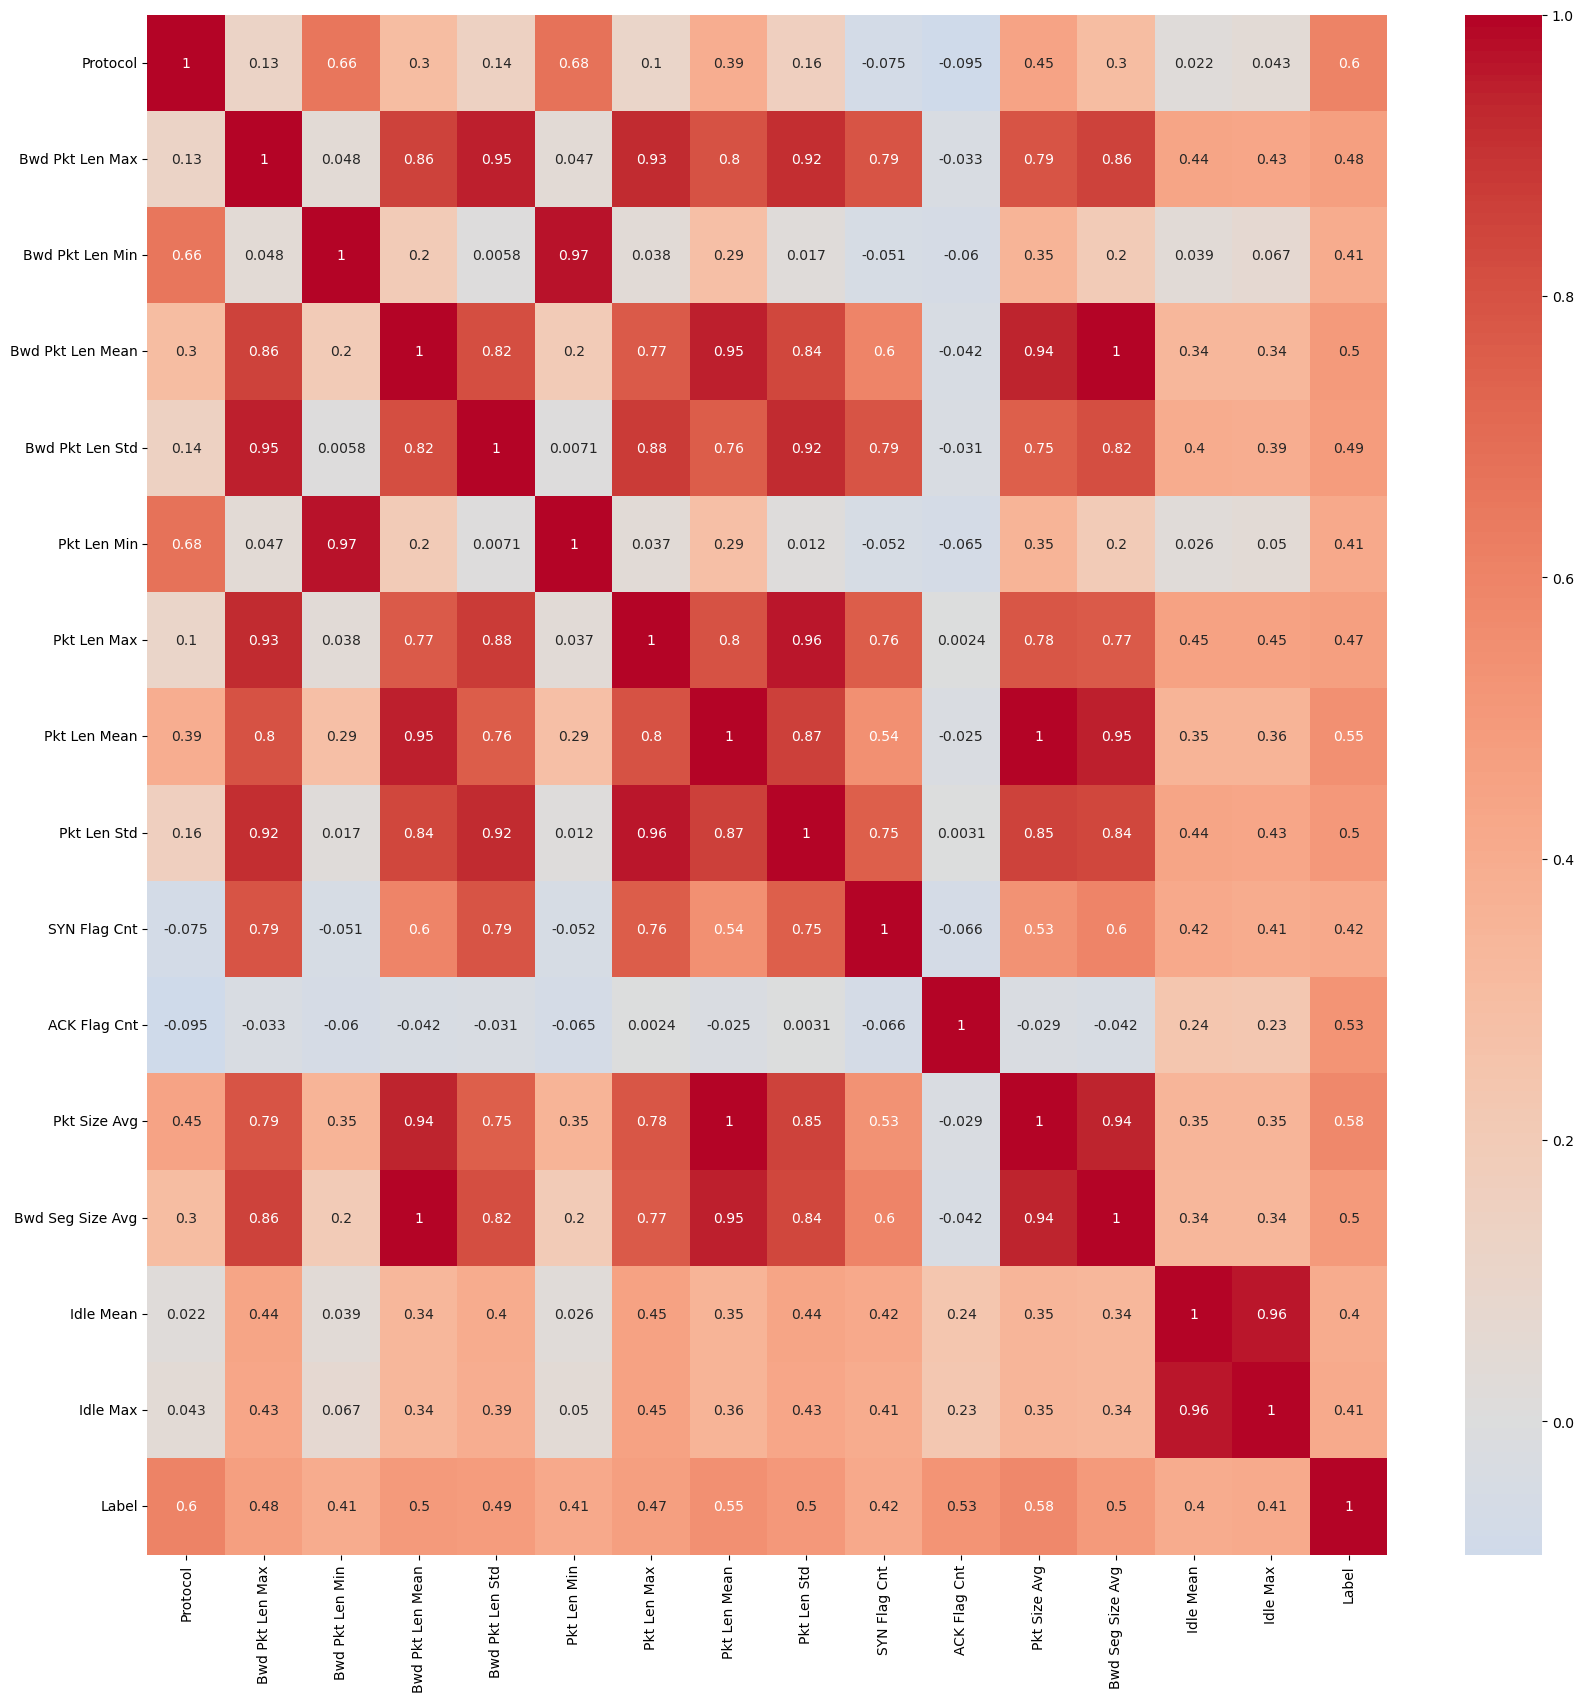

In [283]:
fig , ax = plt.subplots(figsize=(20,20))
sns.heatmap(cr, cmap='coolwarm', center=0, annot=True)
plt.savefig("hea_t.png",dpi=300)
#sns.heatmap(cr, cmap='BrBG', center=0, annot=True)
#sns.heatmap(cr, annot=True, ax=ax)

# PAIRPLOT

# TRAIN TEST SPLIT

In [286]:
#Splitting the data into train and test case
x=correlated_data.drop(labels=['Label'],axis=1)
y=correlated_data['Label']
x.head()

,Protocol,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,SYN Flag Cnt,ACK Flag Cnt,Pkt Size Avg,Bwd Seg Size Avg,Idle Mean,Idle Max
0,6.0,2860.0,0.0,629.857143,1121.166123,0.0,2860.0,378.923077,852.439388,1.0,0.0,410.500000,629.857143,0.0,0.0
1,6.0,1521.0,0.0,630.142857,786.382101,0.0,1521.0,379.076923,638.301060,1.0,0.0,410.666667,630.142857,0.0,0.0
2,6.0,0.0,0.0,0.000000,0.000000,0.0,74.0,18.500000,37.000000,0.0,1.0,24.666667,0.000000,0.0,0.0
3,17.0,93.0,44.0,68.500000,34.648232,44.0,93.0,60.333333,28.290163,0.0,0.0,90.500000,68.500000,0.0,0.0
4,17.0,1250.0,25.0,471.947368,526.736543,25.0,1250.0,472.606061,535.845298,0.0,0.0,487.375000,471.947368,0.0,0.0


In [287]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30)

In [288]:
print(x_train.shape,x_test.shape)

(68036, 15) (17009, 15)


In [289]:
y_train.shape,y_test.shape

((68036,), (17009,))

In [290]:
test_y = np.array(y_test)
test_y

array([0, 1, 0, ..., 1, 0, 1])

In [291]:
y_train =np.array(y_train)
y_train

array([1, 0, 0, ..., 0, 1, 0])

# Feature Scaling

In [293]:
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [294]:
x_test.shape

(17009, 15)

In [295]:
x_train.shape

(68036, 15)

# WORK FOR TRAINING DATA

# Cross validation

In [298]:
#list of models
models = [LogisticRegression(max_iter=30000),SVC(kernel='linear',probability=True),KNeighborsClassifier(n_neighbors=10),RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=50),GaussianNB(var_smoothing=1e-09),DecisionTreeClassifier()]

In [299]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5)
grid_search.fit(x_train,y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'var_smoothing': 1e-09}


In [300]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'var_smoothing': 1e-09}


In [301]:
from sklearn.model_selection import cross_validate
import pandas as pd

def compare_models_cross_validation(models, x_train, y_train, cv=10):
    """
    Compare multiple models using cross-validation.

    Parameters:
    models (list): List of models to evaluate.
    x_train (array-like): Training feature data.
    y_train (array-like): Training target data.
    cv (int): Number of cross-validation folds.

    Returns:
    pd.DataFrame: DataFrame containing mean metrics for each model.
    """
    results = []

    for model in models:
        print(f"Evaluating model: {model.__class__.__name__}...")
        try:
            # Perform cross-validation with multiple metrics
            scores = cross_validate(
                model, x_train, y_train,
                scoring=['accuracy', 'precision', 'recall', 'f1'],
                cv=cv, n_jobs=-1
            )

            # Store mean metrics
            results.append({
                'Model': model.__class__.__name__,
                'Accuracy': scores['test_accuracy'].mean(),
                'Precision': scores['test_precision'].mean(),
                'Recall': scores['test_recall'].mean(),
                'F1 Score': scores['test_f1'].mean()
            })
        except Exception as e:
            print(f"Error evaluating model {model.__class__.__name__}: {e}")

    # Convert results to a DataFrame
    return pd.DataFrame(results)

In [302]:
results = compare_models_cross_validation(models, x_train, y_train, cv=10)
print(results)

Evaluating model: LogisticRegression...
Evaluating model: SVC...
Evaluating model: KNeighborsClassifier...
Evaluating model: RandomForestClassifier...
Evaluating model: GaussianNB...
Evaluating model: DecisionTreeClassifier...
                    Model  Accuracy  Precision    Recall  F1 Score
0      LogisticRegression  0.998133   0.997105  0.994736  0.995918
1                     SVC  0.998280   0.997043  0.995442  0.996241
2    KNeighborsClassifier  0.998971   0.996797  0.998716  0.997755
3  RandomForestClassifier  0.998971   0.996797  0.998716  0.997755
4              GaussianNB  0.998971   0.996797  0.998716  0.997755
5  DecisionTreeClassifier  0.998677   0.996793  0.997432  0.997112


# With 10 fold CROSS VALIDATION

In [304]:
def ytprediction(models, x_train, y_train, use_cv=False):
    """
    Train models and predict on training data.

    Parameters:
    models (list): List of models to train.
    x_train (array-like): Training feature data.
    y_train (array-like): Training target data.
    use_cv (bool): If True, use cross-validation to make predictions on the training data.

    Returns:
    list: A list of predictions for each model.
    """
    y_pred_train = []

    for model in models:
        if use_cv:
            # Use cross-validation for predictions on the training data
            ytrain_pred = cross_val_predict(model, x_train, y_train, cv=10)
        else:
            # Fit the model and predict on the training data
            model.fit(x_train, y_train)
            ytrain_pred = model.predict(x_train)

        y_pred_train.append(ytrain_pred)

    return y_pred_train

In [305]:
y_pred_train=ytprediction(models, x_train, y_train, use_cv=False)

In [306]:
y_pred_train[0]

array([1, 0, 0, ..., 0, 1, 0])

# CONFUSION MATRIX

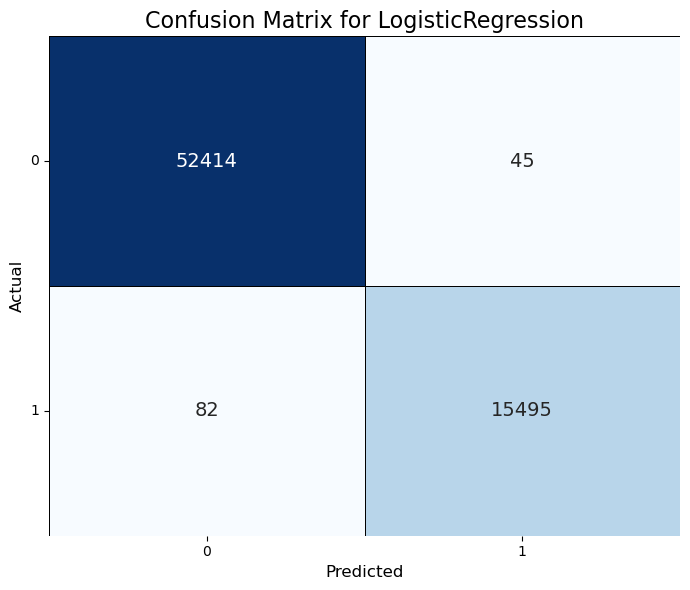

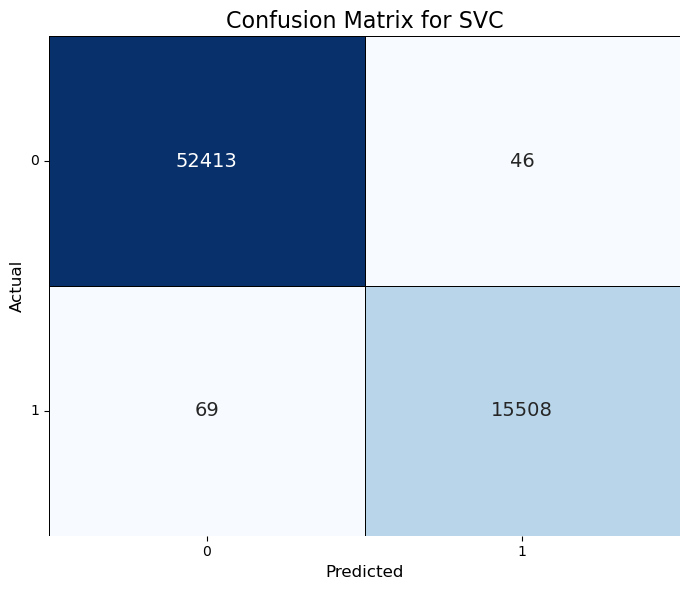

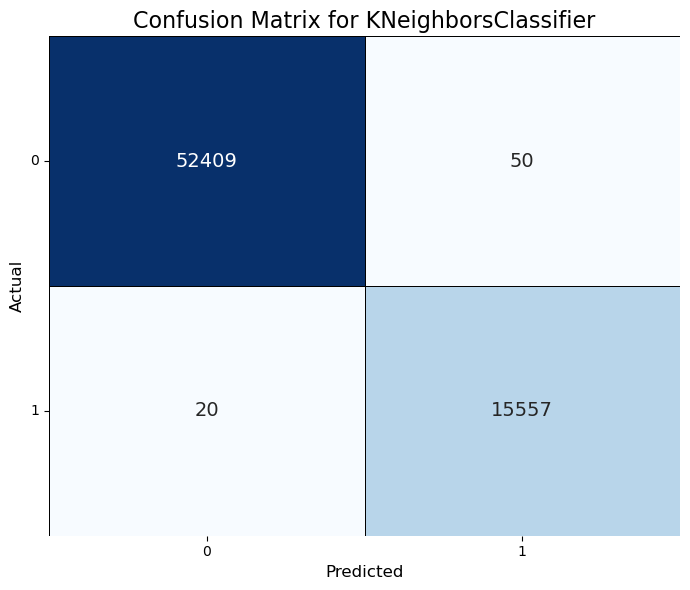

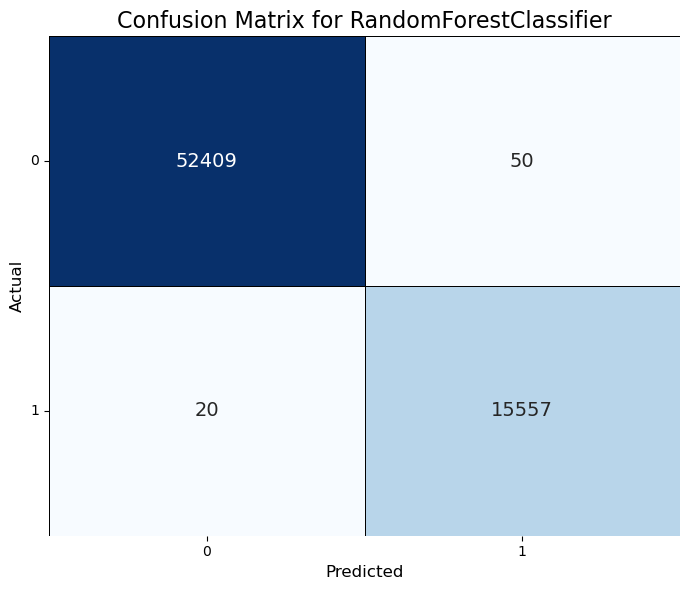

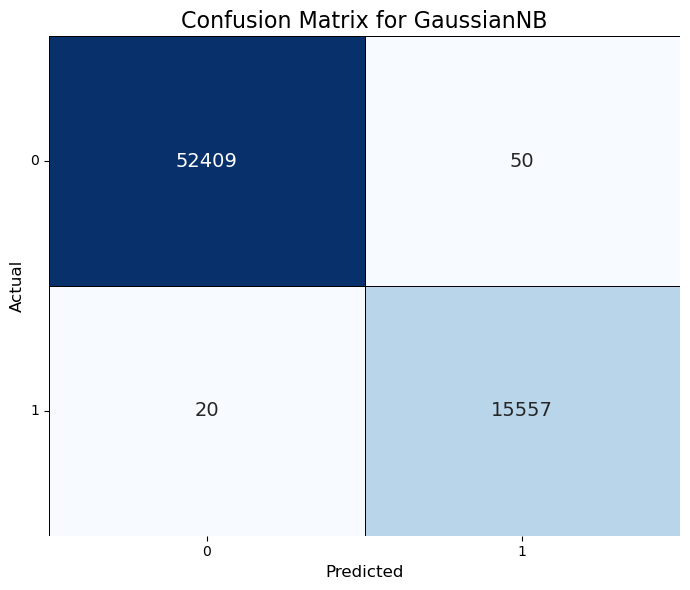

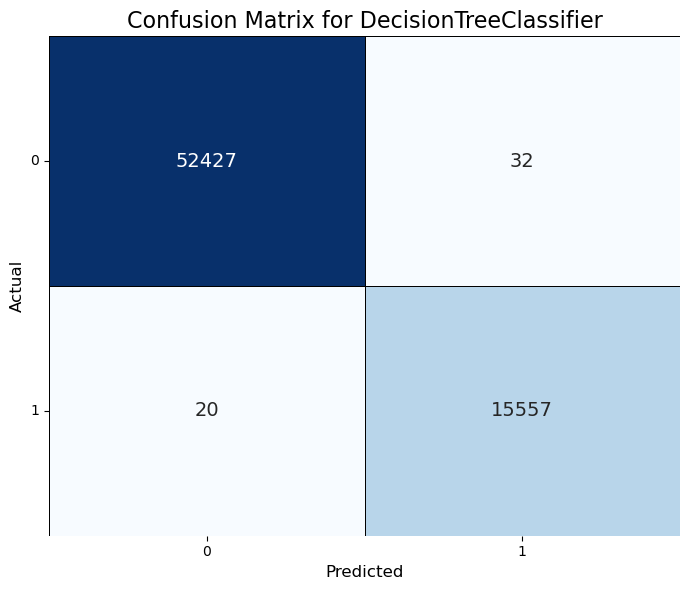

In [308]:
def seaborn_custom_conf_matrix(models, y_train, y_pred_train, cv=10):
    for i, y_pred in enumerate(y_pred_train):
        cm = confusion_matrix(y_train, y_pred)
        plt.figure(figsize=(7, 6))

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 14},
                    linewidths=0.5, linecolor='black', cbar=False)

        plt.title(f'Confusion Matrix for {models[i].__class__.__name__}', fontsize=16)
        plt.xlabel('Predicted', fontsize=12)
        plt.ylabel('Actual', fontsize=12)
        plt.xticks(rotation=0, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)

        plt.tight_layout()
        plt.savefig("c"+models[i].__class__.__name__+".png",dpi = 300)
        plt.show()

seaborn_custom_conf_matrix(models, y_train, y_pred_train)

In [309]:
def train_conf_matrix():
    for i, model in enumerate(models):
        cf_matrix = confusion_matrix(y_train,y_pred_train[i])
        ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

        ax.set_title('Training Seaborn Confusion Matrix with labels\n\n');
        ax.set_xlabel('\nPredicted ')
        ax.set_ylabel('Actual  ');
        plt.show()
        print(model)
        print('*******************************************************')
        print()

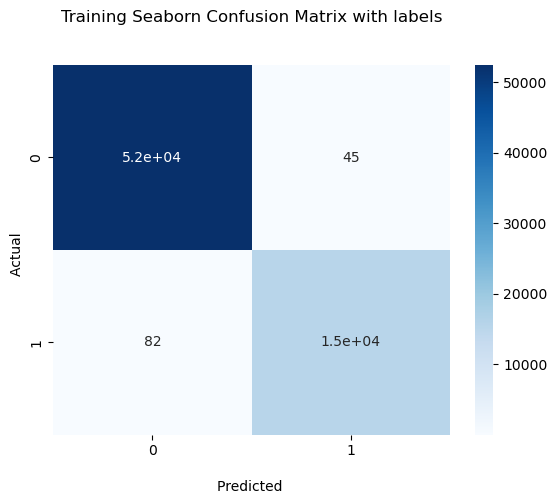

LogisticRegression(max_iter=30000)
*******************************************************



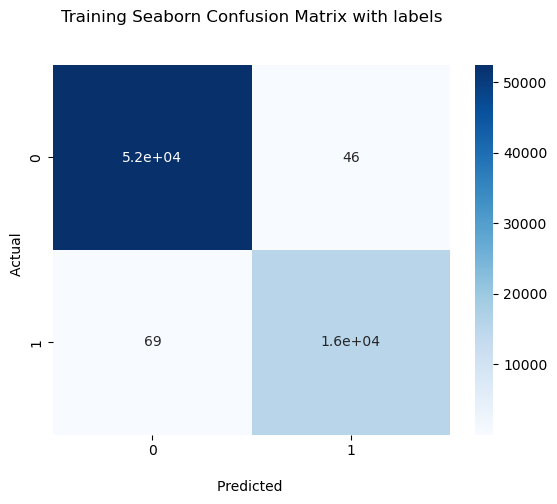

SVC(kernel='linear', probability=True)
*******************************************************



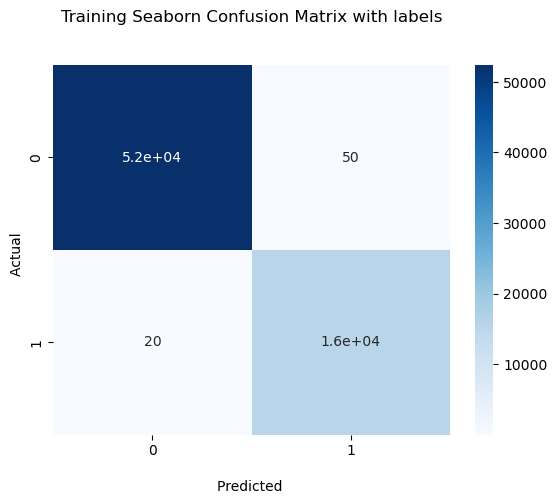

KNeighborsClassifier(n_neighbors=10)
*******************************************************



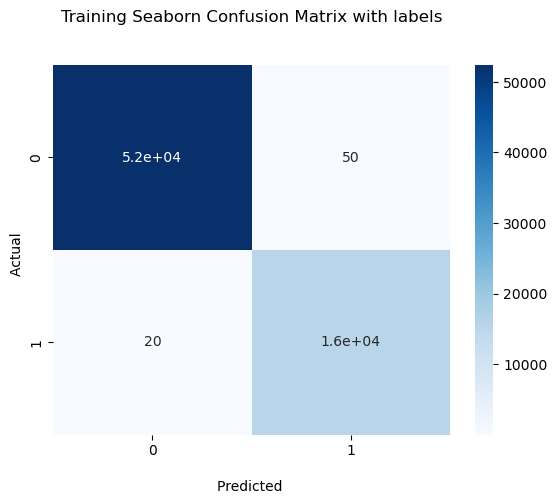

RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, random_state=42)
*******************************************************



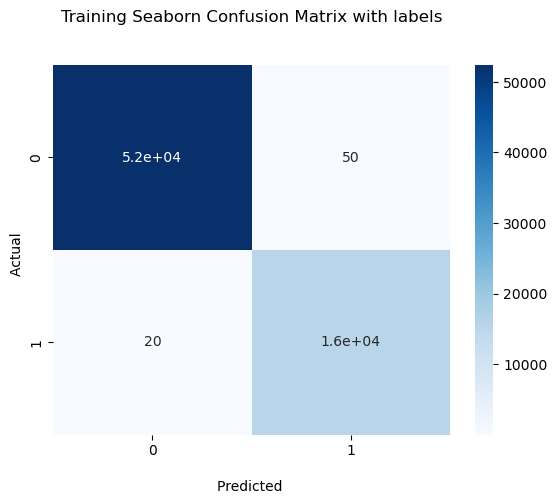

GaussianNB()
*******************************************************



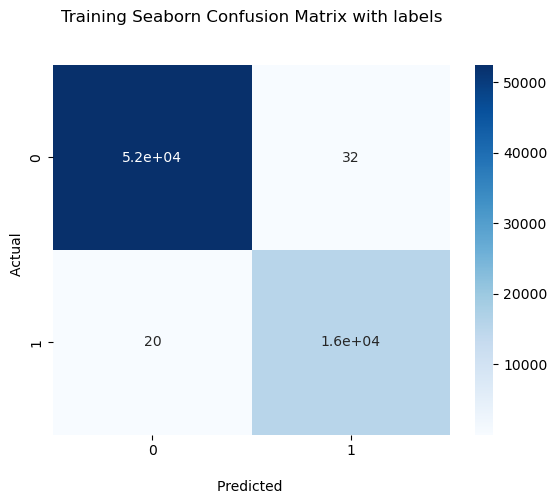

DecisionTreeClassifier()
*******************************************************



In [310]:
train_conf_matrix()

In [311]:
def dp():
    tacc = []
    tprec = []
    trec = []
    tf1 = []
    #y_pred_train = []
    for i, model in enumerate(models):
        #ytrain_pred = model.predict(x_train)
        #y_pred_train.append(ytrain_pred)
        accuracy = metrics.accuracy_score(y_train,y_pred_train[i])
        #print(accuracy)
        tacc.append(accuracy)
        precision=metrics.precision_score(y_train,y_pred_train[i])
        #print(precision)
        tprec.append(precision)
        recall = metrics.recall_score(y_train,y_pred_train[i])
        #print(recall)
        trec.append(recall)
        t_f1=metrics.f1_score(y_train,y_pred_train[i])
        #print(t_f1)
        tf1.append(t_f1)
    return tacc,tprec,trec,tf1

In [312]:
tacc,tprec,trec,tf1 = dp()

In [313]:
def aprf():
    print('Displaying the values for the train data')
    for i, model in enumerate(models):
        print('-------------------------------------------------------')
        print('Accuracy of the ',model,'=',tacc[i])
        print('Precision of the ',model,'=',tprec[i])
        print('Recall of the ',model,'=',trec[i])
        print('F1 score of the ',model,'=',tf1[i])
        print('---------------------------------------------------------')

In [314]:
aprf()

Displaying the values for the train data
-------------------------------------------------------
Accuracy of the  LogisticRegression(max_iter=30000) = 0.9981333411723206
Precision of the  LogisticRegression(max_iter=30000) = 0.997104247104247
Recall of the  LogisticRegression(max_iter=30000) = 0.9947358284650446
F1 score of the  LogisticRegression(max_iter=30000) = 0.995918629687952
---------------------------------------------------------
-------------------------------------------------------
Accuracy of the  SVC(kernel='linear', probability=True) = 0.9983097183843848
Precision of the  SVC(kernel='linear', probability=True) = 0.997042561398997
Recall of the  SVC(kernel='linear', probability=True) = 0.9955703922449766
F1 score of the  SVC(kernel='linear', probability=True) = 0.9963059329928368
---------------------------------------------------------
-------------------------------------------------------
Accuracy of the  KNeighborsClassifier(n_neighbors=10) = 0.9989711329296255
Preci

# GRAPH FOR THE TRAIN DATA

# TRAINING ACCURACY GRAPH

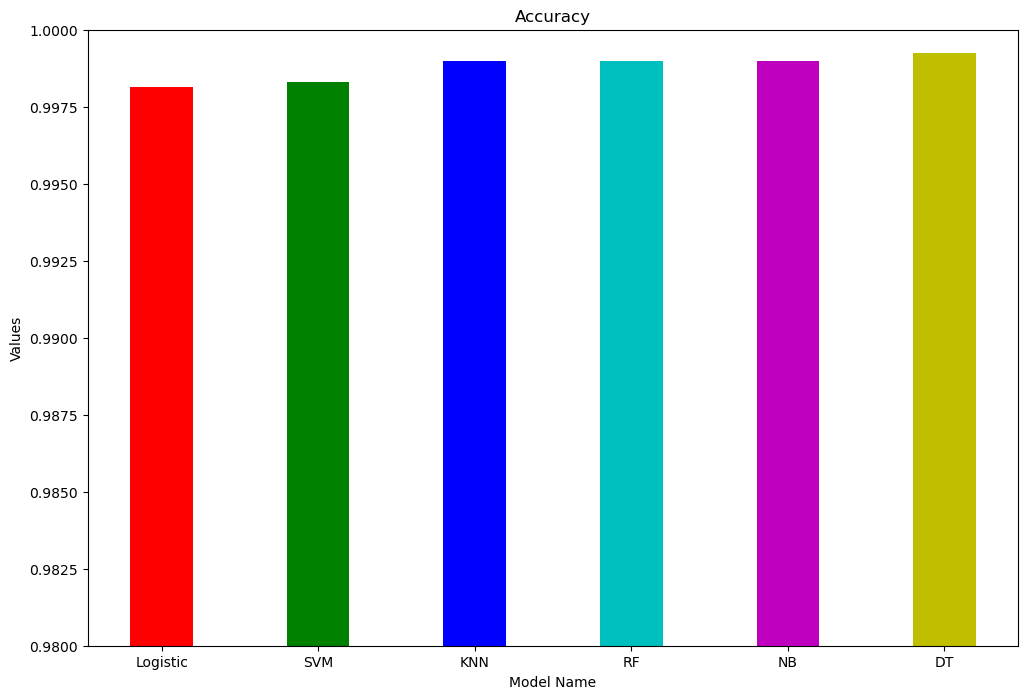

In [317]:
#graph plotting
val = {'Logistic':tacc[0],'SVM':tacc[1],'KNN':tacc[2],'RF':tacc[3],'NB':tacc[4],'DT':tacc[5]}
model_name = list(val.keys())
values = list(val.values())
plt.figure(figsize=(12, 8))

axes = plt.axes()
axes.set_ylim([0.98, 1.0])
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('Accuracy')
color = ['r','g','b','c','m','y']
plt.bar(model_name,values,color=color,width = 0.4)
plt.savefig("Train Accuracy.png",dpi = 300)
plt.show()

In [318]:
mod = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','KNN', 'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [
        tacc[0],
        tacc[1],
        tacc[2],
        tacc[3],
        tacc[4],
        tacc[5]
    ]})
mod.sort_values(by='Score', ascending=False)

,Model,Score
5,Decision Tree,0.999236
2,KNN,0.998971
3,Random Forest,0.998971
4,Naive Bayes,0.998971
1,SVM,0.998310
0,Logistic Regression,0.998133


# TRAINING PRECISION GRAPH

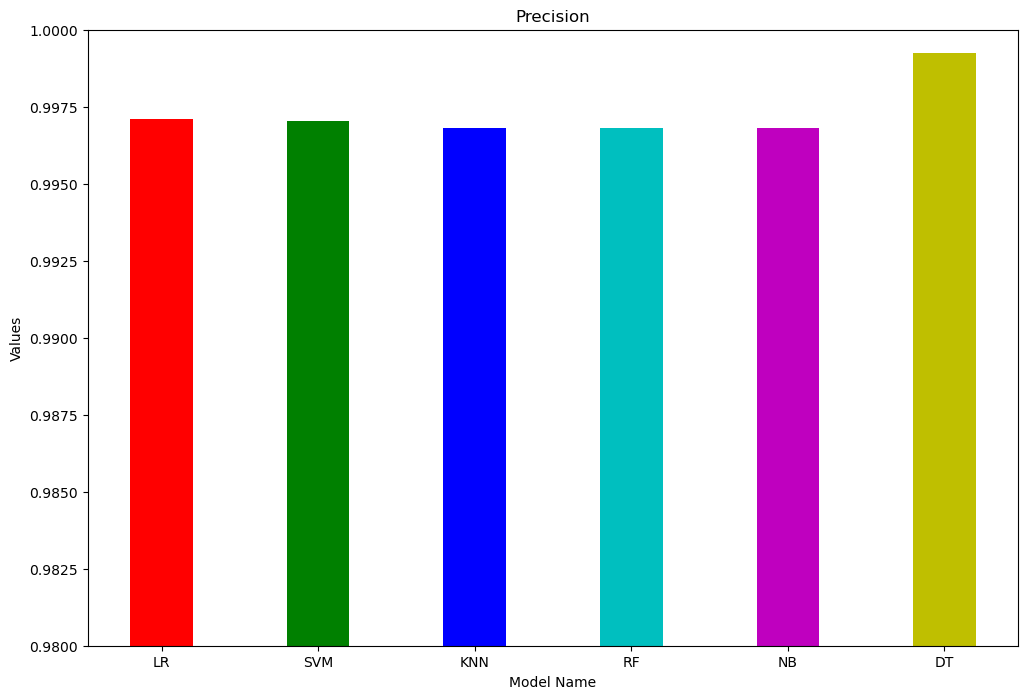

In [320]:
val = {'LR':tprec[0],'SVM':tprec[1],'KNN':tprec[2],'RF':tprec[3],'NB':tprec[4],'DT':tacc[5]}
model_name = list(val.keys())
values = list(val.values())

plt.figure(figsize=(12, 8))
axes = plt.axes()
axes.set_ylim([0.98, 1.0])
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('Precision')
color = ['r','g','b','c','m','y']
plt.bar(model_name,values,color=color,width = 0.4)
plt.savefig("Train Precision.png",dpi = 300)
plt.show()

In [321]:
mod = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','KNN', 'Random Forest', 'Naive Bayes','Decision tree'],
    'Score': [
        tprec[0],
        tprec[1],
        tprec[2],
        tprec[3],
        tprec[4],
        tprec[5]
    ]})
mod.sort_values(by='Score', ascending=False)

,Model,Score
5,Decision tree,0.997947
0,Logistic Regression,0.997104
1,SVM,0.997043
2,KNN,0.996796
3,Random Forest,0.996796
4,Naive Bayes,0.996796


# TRAINING RECALL GRAPH

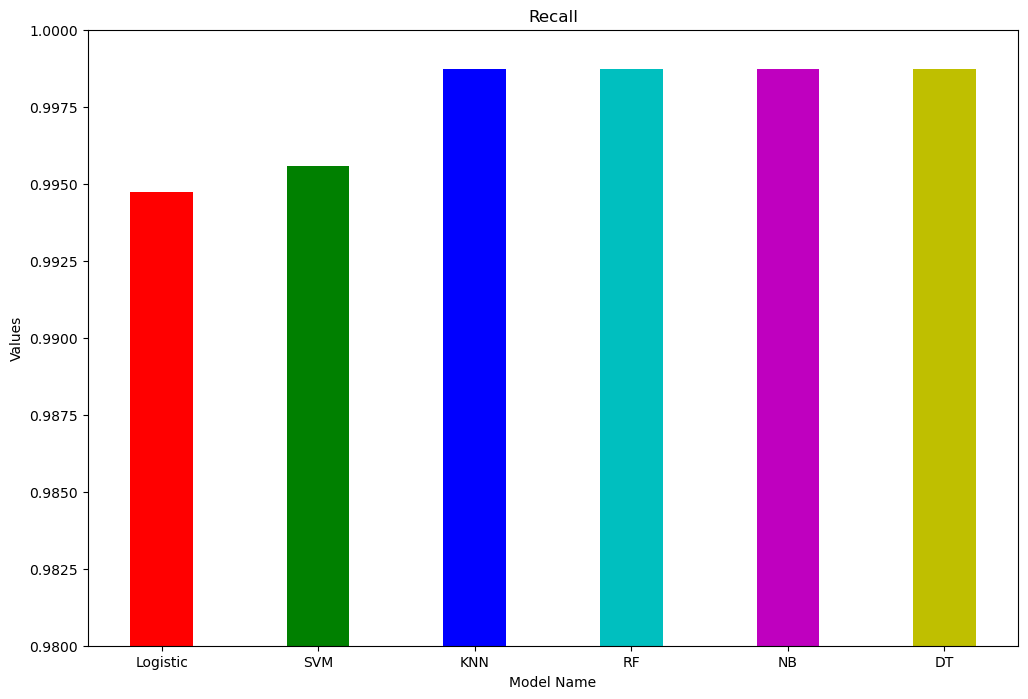

In [323]:
val = {'Logistic':trec[0],'SVM':trec[1],'KNN':trec[2],'RF':trec[3],'NB':trec[4],'DT':trec[5]}
model_name = list(val.keys())
values = list(val.values())
plt.figure(figsize=(12, 8))

axes = plt.axes()
axes.set_ylim([0.98, 1.0])
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('Recall')
color = ['r','g','b','c','m','y']
plt.bar(model_name,values,color=color,width = 0.4)
plt.savefig("Train Recall.png",dpi = 300)
plt.show()

In [324]:
mod = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','KNN', 'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [
        trec[0],
        trec[1],
        trec[2],
        trec[3],
        trec[4],
        trec[5]
    ]})
mod.sort_values(by='Score', ascending=False)

,Model,Score
2,KNN,0.998716
3,Random Forest,0.998716
4,Naive Bayes,0.998716
5,Decision Tree,0.998716
1,SVM,0.995570
0,Logistic Regression,0.994736


# TRAINING F1 SCORE GRPAH

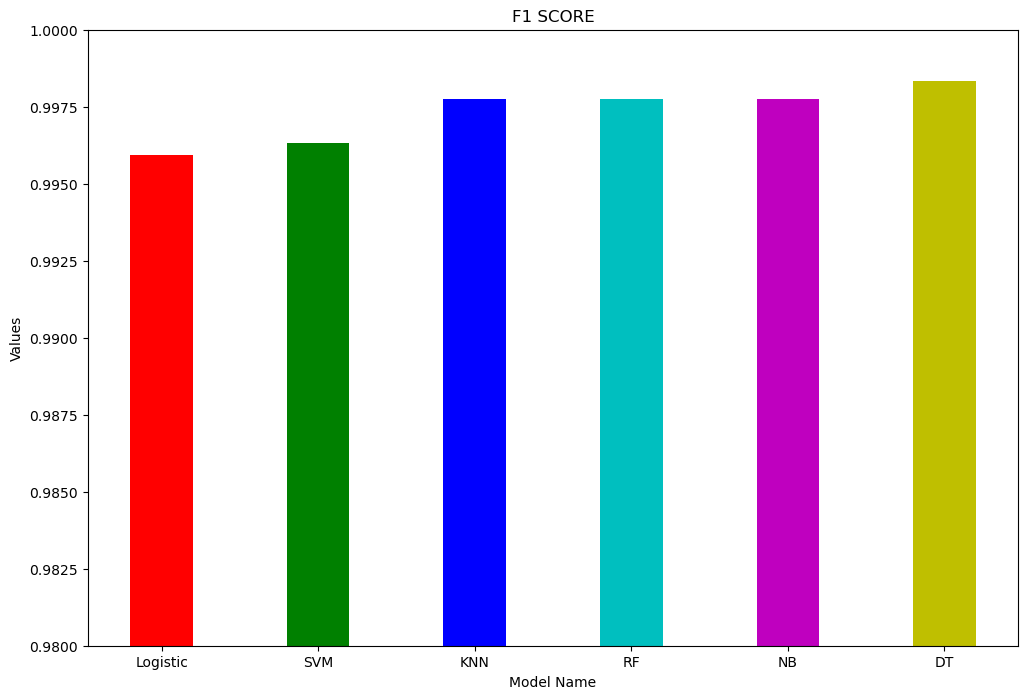

In [326]:
val = {'Logistic':tf1[0],'SVM':tf1[1],'KNN':tf1[2],'RF':tf1[3],'NB':tf1[4],'DT':tf1[5]}
model_name = list(val.keys())
values = list(val.values())

plt.figure(figsize=(12, 8))
axes = plt.axes()
axes.set_ylim([0.98, 1.0])
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('F1 SCORE')
color = ['r','g','b','c','m','y']
plt.bar(model_name,values,color=color,width = 0.4)
plt.savefig("Train F1 SCORE.png",dpi = 300)
plt.show()

In [327]:
mod = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','KNN', 'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [
        tf1[0],
        tf1[1],
        tf1[2],
        tf1[3],
        tf1[4],
        tf1[5]
    ]})
mod.sort_values(by='Score', ascending=False)

,Model,Score
5,Decision Tree,0.998332
2,KNN,0.997755
3,Random Forest,0.997755
4,Naive Bayes,0.997755
1,SVM,0.996306
0,Logistic Regression,0.995919


# TAINING ROC CURVE

In [329]:
def trc_curv(models, x_train, y_train):
    plt.figure(figsize=(10, 8))  # Set figure size to make plots clearer

    for model in models:
        # Get predicted probabilities using cross-validation
        cr_probs = cross_val_predict(model, x_train, y_train, cv=10, method='predict_proba')[:, 1]  # Probabilities for class 1

        # Calculate the ROC curve and AUROC
        cr_fpr, cr_tpr, _ = roc_curve(y_train, cr_probs)
        cr_auc = roc_auc_score(y_train, cr_probs)

        # Print model and AUROC score
        print(f"Model: {model.__class__.__name__}")
        print(f"AUROC: {cr_auc:.10f}")
        print('----------------------------------------------------------------------------------')

        # Plot ROC curve
        plt.plot(cr_fpr, cr_tpr, marker='*', label=f'{model.__class__.__name__} (AUROC = {cr_auc:.10f})')

    # Plot the random classifier line
    plt.plot([0, 1], [0, 1], 'r--', label="Random Classifier")

    # Title and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Show legend
    plt.legend(loc='lower right')

    # Show the plot
    plt.savefig("TrainROCall.png",dpi = 300)
    plt.show()
    print('--------------------------------------------------------------------------------')

Model: LogisticRegression
AUROC: 0.9960225580
----------------------------------------------------------------------------------
Model: SVC
AUROC: 0.9960077848
----------------------------------------------------------------------------------
Model: KNeighborsClassifier
AUROC: 0.9989095536
----------------------------------------------------------------------------------
Model: RandomForestClassifier
AUROC: 0.9988960641
----------------------------------------------------------------------------------
Model: GaussianNB
AUROC: 0.9988300324
----------------------------------------------------------------------------------
Model: DecisionTreeClassifier
AUROC: 0.9974217786
----------------------------------------------------------------------------------


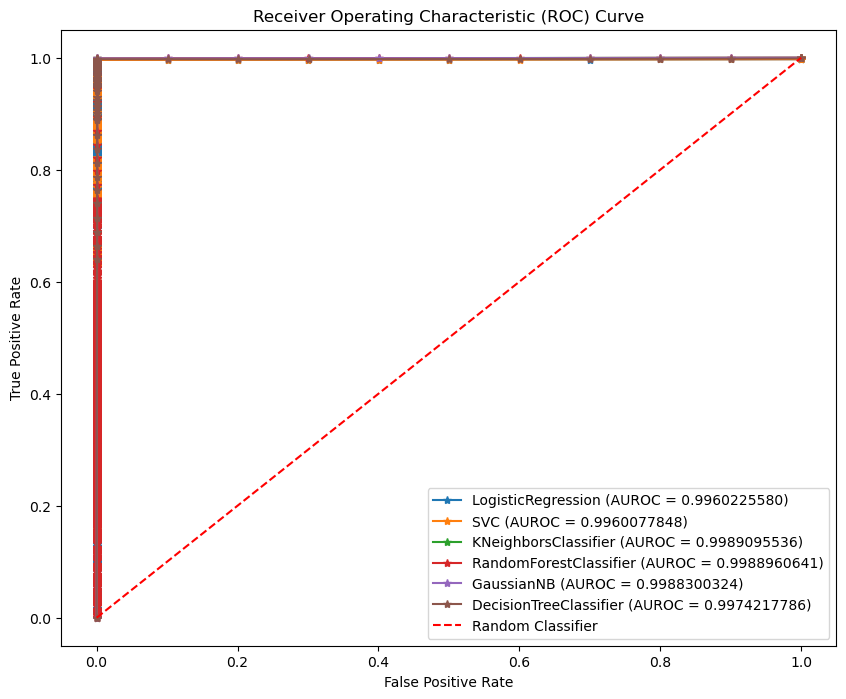

--------------------------------------------------------------------------------


In [330]:
trc_curv(models, x_train, y_train)

In [331]:

def trc_curv(models, x_train, y_train):
    for model in models:
        # Get predicted probabilities using cross-validation
        cr_probs = cross_val_predict(model, x_train, y_train, cv=10, method='predict_proba')[:, 1]  # Probabilities for class 1

        # Calculate the ROC curve and AUROC
        cr_fpr, cr_tpr, _ = roc_curve(y_train, cr_probs)
        cr_auc = roc_auc_score(y_train, cr_probs)

        # Print model and AUROC score
        print(f"Model: {model.__class__.__name__}")
        print(f"AUROC: {cr_auc:.10f}")
        print('----------------------------------------------------------------------------------')

        # Create a new figure for each model
        plt.figure(figsize=(8, 6))

        # Plot ROC curve for the current model
        plt.plot(cr_fpr, cr_tpr, marker='*', label=f'{model.__class__.__name__} (AUROC = {cr_auc:.10f})')

        # Plot the random classifier line
        plt.plot([0, 1], [0, 1], 'r--', label="Random Classifier")

        # Title and labels
        plt.title(f'ROC Curve for {model.__class__.__name__}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')

        # Show legend
        plt.legend(loc='lower right')

        # Show the plot for the current model
        plt.savefig(model.__class__.__name__+".png",dpi = 300)
        plt.show()
        print('--------------------------------------------------------------------------------')

Model: LogisticRegression
AUROC: 0.9960225580
----------------------------------------------------------------------------------


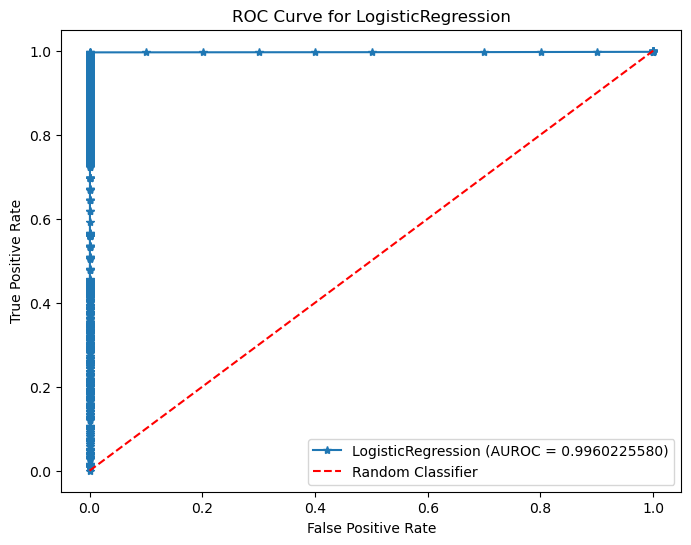

--------------------------------------------------------------------------------
Model: SVC
AUROC: 0.9960494783
----------------------------------------------------------------------------------


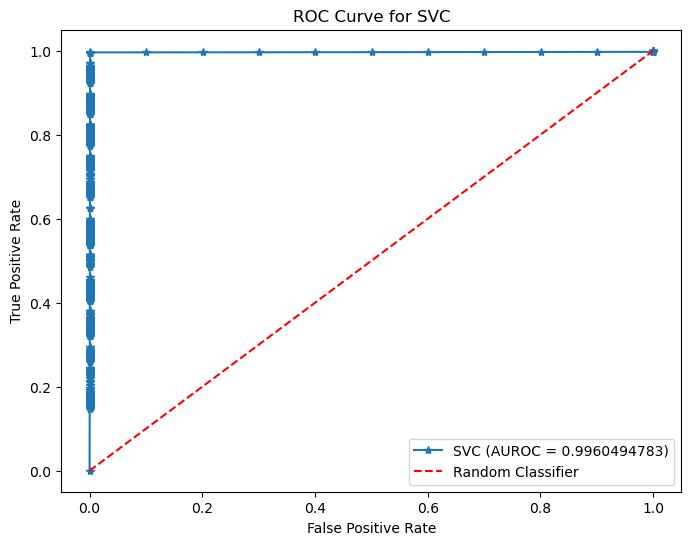

--------------------------------------------------------------------------------
Model: KNeighborsClassifier
AUROC: 0.9989095536
----------------------------------------------------------------------------------


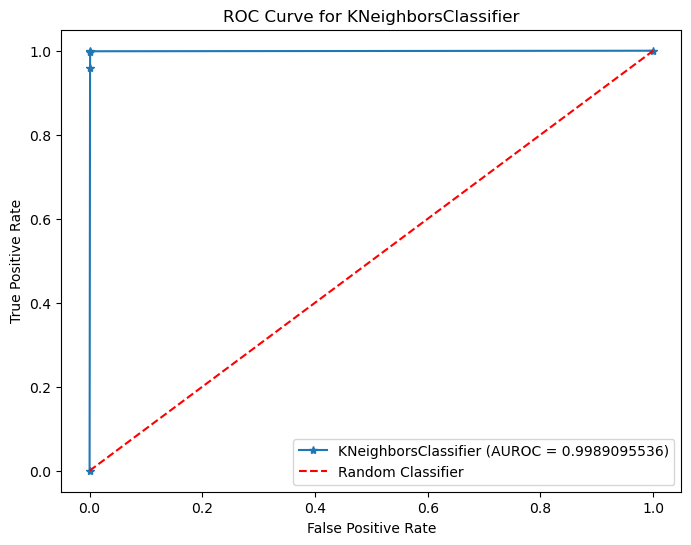

--------------------------------------------------------------------------------
Model: RandomForestClassifier
AUROC: 0.9988960641
----------------------------------------------------------------------------------


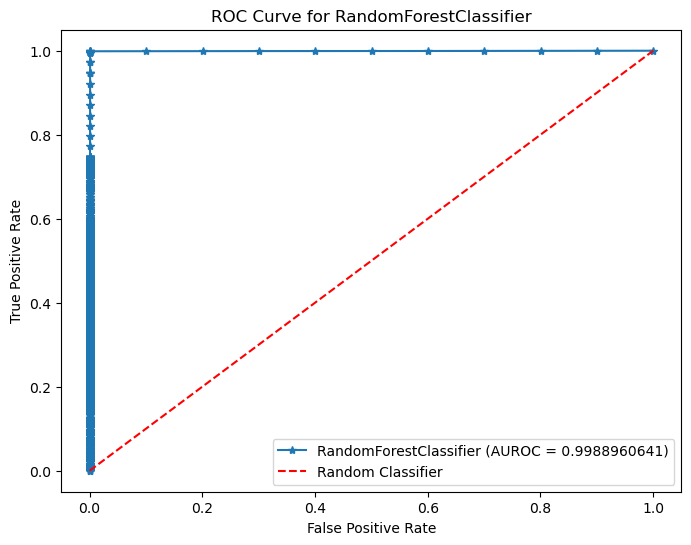

--------------------------------------------------------------------------------
Model: GaussianNB
AUROC: 0.9988300324
----------------------------------------------------------------------------------


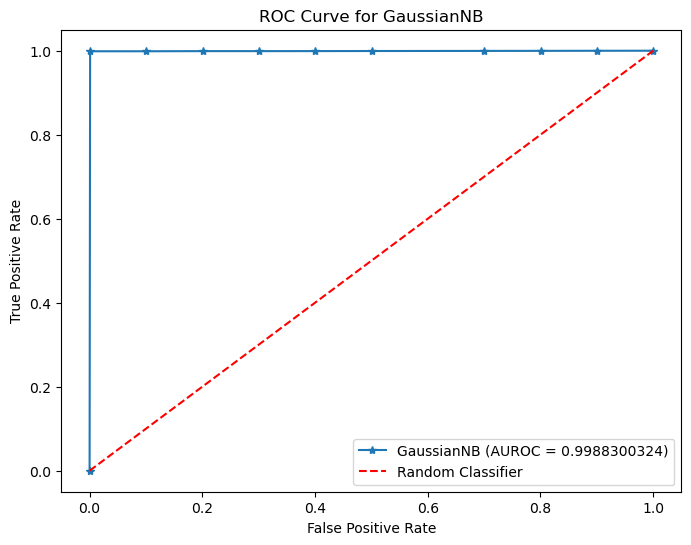

--------------------------------------------------------------------------------
Model: DecisionTreeClassifier
AUROC: 0.9974603846
----------------------------------------------------------------------------------


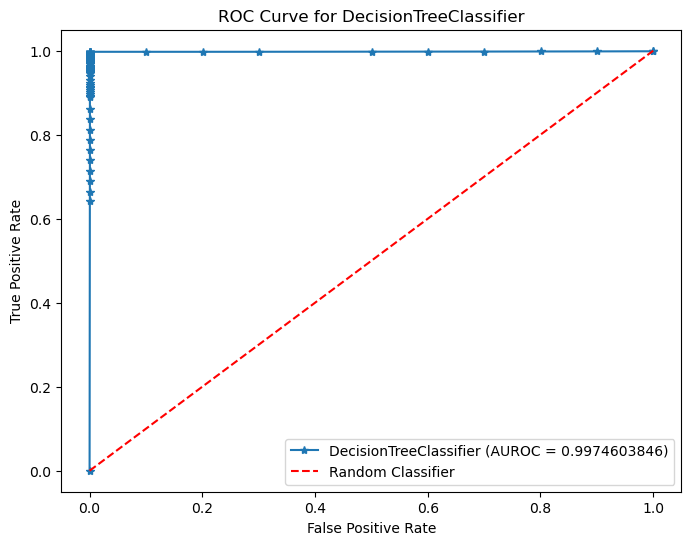

--------------------------------------------------------------------------------


In [332]:
trc_curv(models, x_train, y_train)

In [333]:
def ytprediction():
    y_pred_train = []
    for model in models:
        model.fit(x_train,y_train)
        ytrain_pred = model.predict(x_train)
        y_pred_train.append(ytrain_pred)
    return y_pred_train

In [334]:
y_pred_train=ytprediction()

In [335]:
y_pred_train[0]

array([1, 0, 0, ..., 0, 1, 0])

In [336]:
def trc_curv():
    for i,model in enumerate(models):
        cr_probs = model.predict_proba(x_train)
        cr_probs = cr_probs[:, 1]
        cr_auc = roc_auc_score(y_train, cr_probs)
        #cr_auc=np.append(cr_auc,cr_auc)
        cr_fpr,cr_tpr, _ = roc_curve(y_train,cr_probs)
        #cr_fpr=np.append(cr_fpr,cr_fpr)
        #cr_tpr=np.append(cr_tpr,cr_tpr)
        print(model)
        print('----------------------------------------------------------------------------------')
        plt.plot(cr_fpr,cr_tpr, marker='*',label='(AUROC = %0.10f)'% cr_auc)
        plt.plot([0, 1], [0, 1],'r--')
        plt.title('ROC PLOT')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        #plt.savefig('roc_grpah.jpg')
        plt.show()
        print('--------------------------------------------------------------------------------')

LogisticRegression(max_iter=30000)
----------------------------------------------------------------------------------


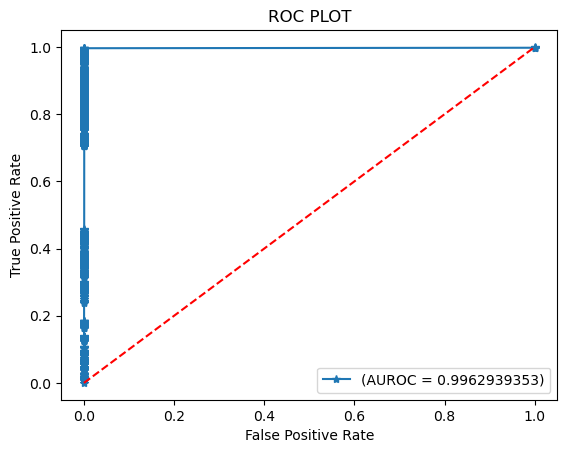

--------------------------------------------------------------------------------
SVC(kernel='linear', probability=True)
----------------------------------------------------------------------------------


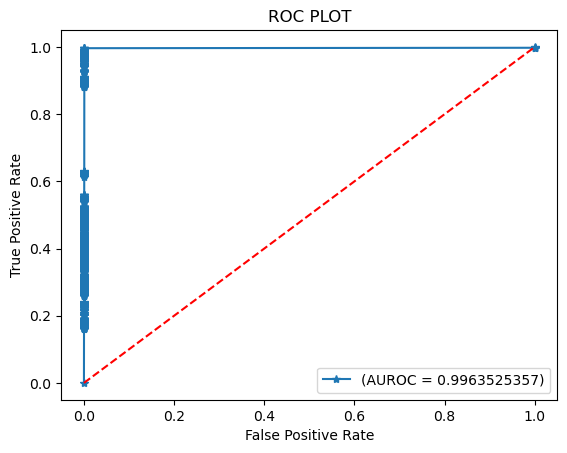

--------------------------------------------------------------------------------
KNeighborsClassifier(n_neighbors=10)
----------------------------------------------------------------------------------


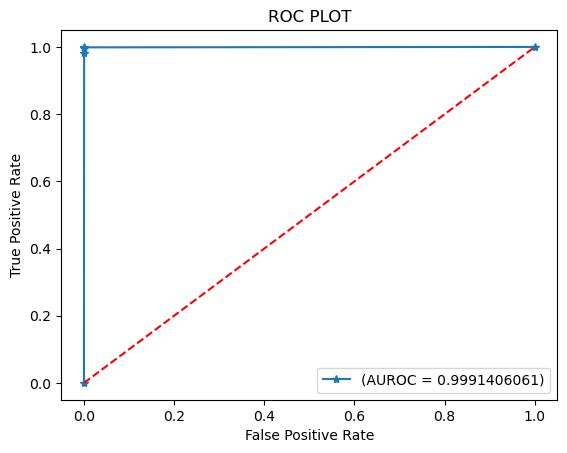

--------------------------------------------------------------------------------
RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, random_state=42)
----------------------------------------------------------------------------------


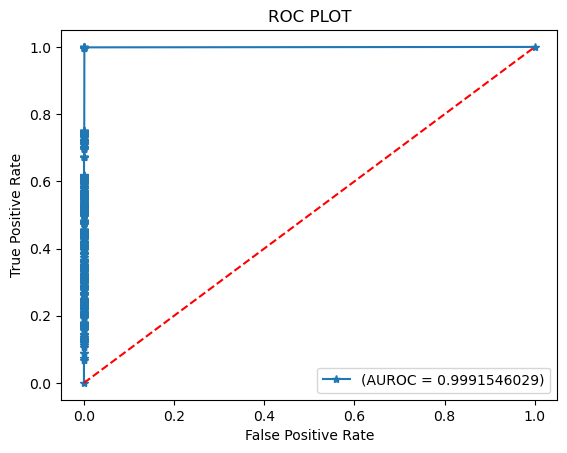

--------------------------------------------------------------------------------
GaussianNB()
----------------------------------------------------------------------------------


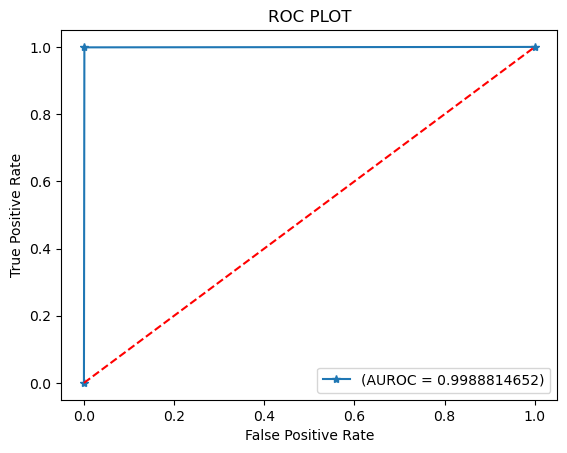

--------------------------------------------------------------------------------
DecisionTreeClassifier()
----------------------------------------------------------------------------------


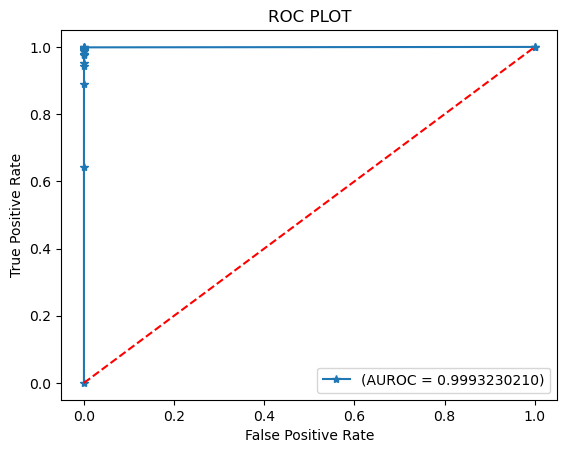

--------------------------------------------------------------------------------


In [337]:
trc_curv()

# WORK FOR THE TEST DATA

# Comparing the performance of the model

In [340]:
def tst_train():
    lst = []
    for model in models:
        y_pred = model.predict(x_test)
        lst.append(y_pred)
    return lst

In [341]:
y_pred = tst_train()
print(y_pred)

[array([0, 1, 0, ..., 0, 0, 1]), array([0, 1, 0, ..., 0, 0, 1]), array([0, 1, 0, ..., 1, 0, 1]), array([0, 1, 0, ..., 1, 0, 1]), array([0, 1, 0, ..., 1, 0, 1]), array([0, 1, 0, ..., 1, 0, 1])]


In [342]:
def model_fitting():
    for i,model in enumerate(models):
        cf_matrix = confusion_matrix(test_y,y_pred[i])
        plt.figure(figsize=(7, 6))

        sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 14},
                    linewidths=0.5, linecolor='black', cbar=False)

        plt.title(f'Confusion Matrix for {models[i].__class__.__name__}', fontsize=16)

        plt.xlabel('Predicted', fontsize=12)
        plt.ylabel('Actual', fontsize=12)
        plt.xticks(rotation=0, fontsize=12)
        plt.yticks(rotation=360, fontsize=12)

        plt.tight_layout()
        plt.show()
        #ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
        #plt.figure(figsize=(12, 8))
        #ax.set_title('Seaborn Confusion Matrix with labels\n\n');
        #ax.set_xlabel('\nPredicted ')
        #ax.set_ylabel('Actual  ');
        #plt.show()
        #print(model)
        #print('*******************************************************')
        #print()

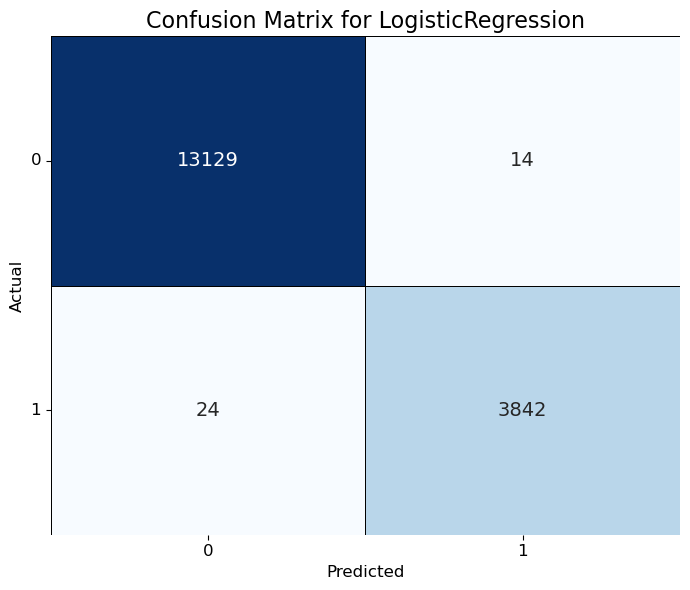

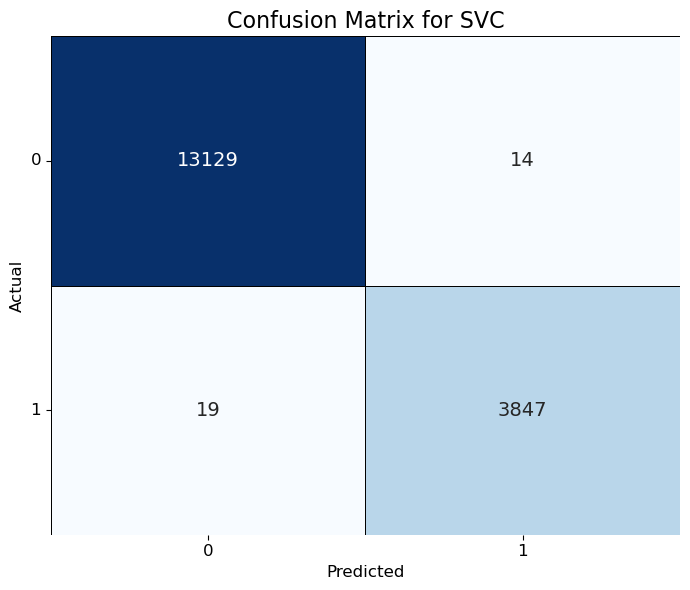

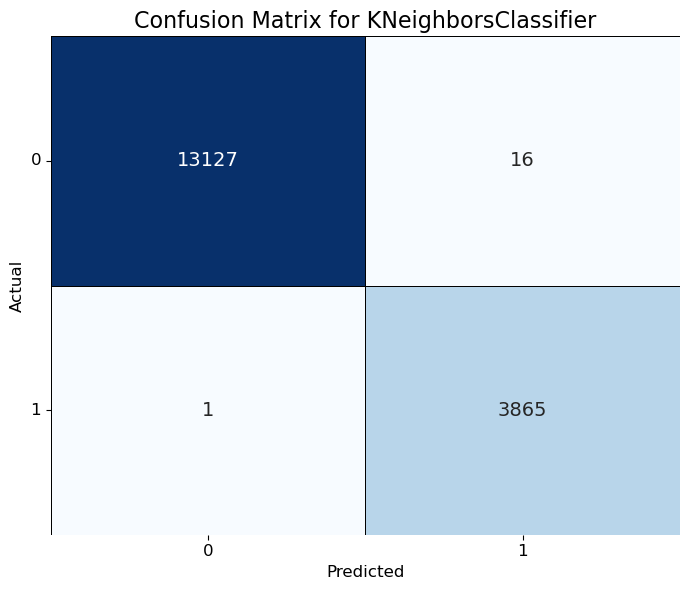

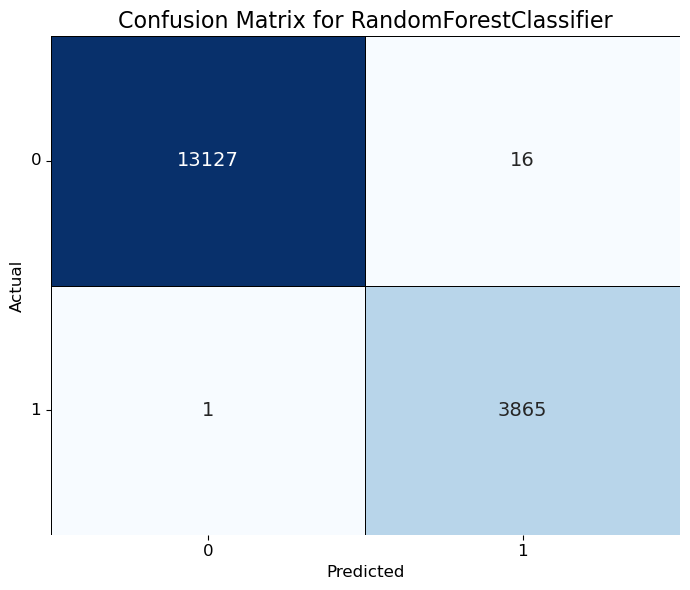

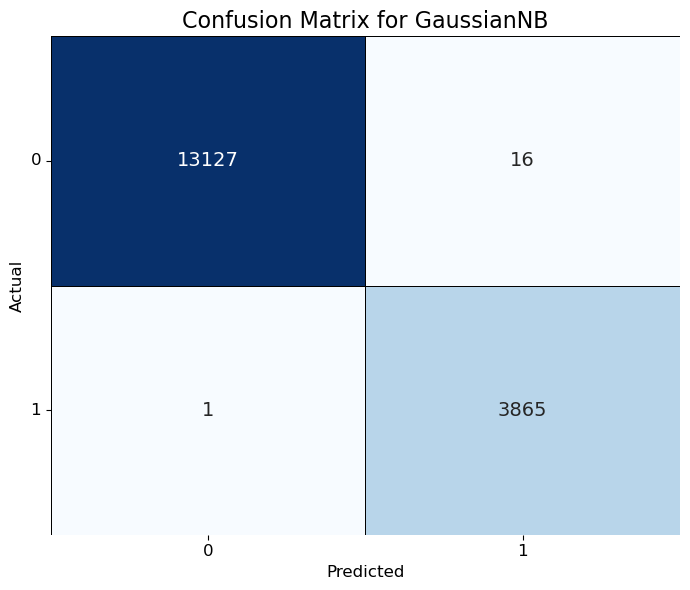

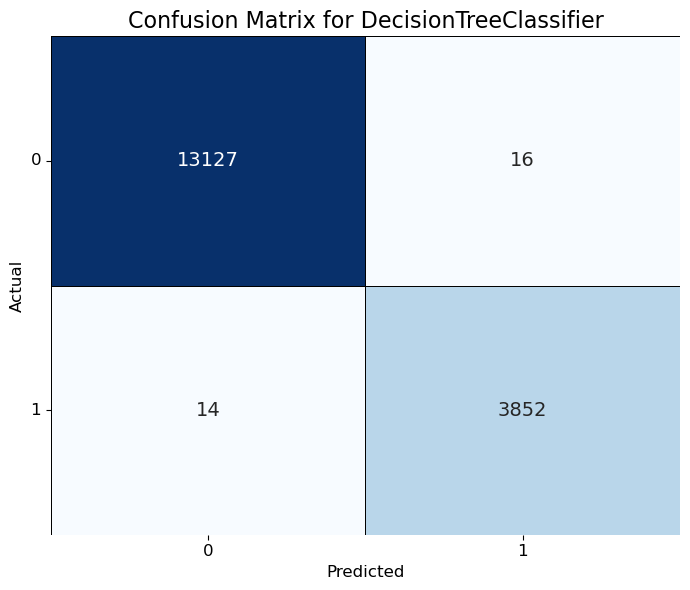

In [343]:
model_fitting()

In [344]:
def comp():
    acc=[]
    pre=[]
    rec=[]
    f1_s=[]
    for i,model in enumerate(models):
        accuracy = metrics.accuracy_score(test_y,y_pred[i])
        acc.append(accuracy)
        precision = metrics.precision_score(test_y,y_pred[i])
        pre.append(precision)
        recall = metrics.recall_score(test_y, y_pred[i])
        rec.append(recall)
        fscore = metrics.f1_score(test_y, y_pred[i])
        f1_s.append(fscore)
    return acc,pre,rec,f1_s


In [345]:
acc,pre,rec,f1_s = comp()

In [346]:
def display():
    target_names = ['Normal', 'DDOS']
    for i,model in enumerate(models):
        print('Accuracy score of the',model,'=',acc[i],'\n')
        print('Precision score of the',model,'=',pre[i],'\n')
        print('Recall score of the',model,'=',rec[i],'\n')
        print('f1 score of the ',model,'=',f1_s[i],'\n')
        print('**********************************************************************')
        print(classification_report(test_y, y_pred[i], target_names=target_names))
        print('-------------------------------------------------------------------------')

In [347]:
display()

Accuracy score of the LogisticRegression(max_iter=30000) = 0.9977658886471867 

Precision score of the LogisticRegression(max_iter=30000) = 0.9963692946058091 

Recall score of the LogisticRegression(max_iter=30000) = 0.9937920331091568 

f1 score of the  LogisticRegression(max_iter=30000) = 0.9950789950789951 

**********************************************************************
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     13143
        DDOS       1.00      0.99      1.00      3866

    accuracy                           1.00     17009
   macro avg       1.00      1.00      1.00     17009
weighted avg       1.00      1.00      1.00     17009

-------------------------------------------------------------------------
Accuracy score of the SVC(kernel='linear', probability=True) = 0.9980598506672937 

Precision score of the SVC(kernel='linear', probability=True) = 0.9963739963739964 

Recall score of the SVC(kernel='linear', prob

# ACCURACY GRAPH

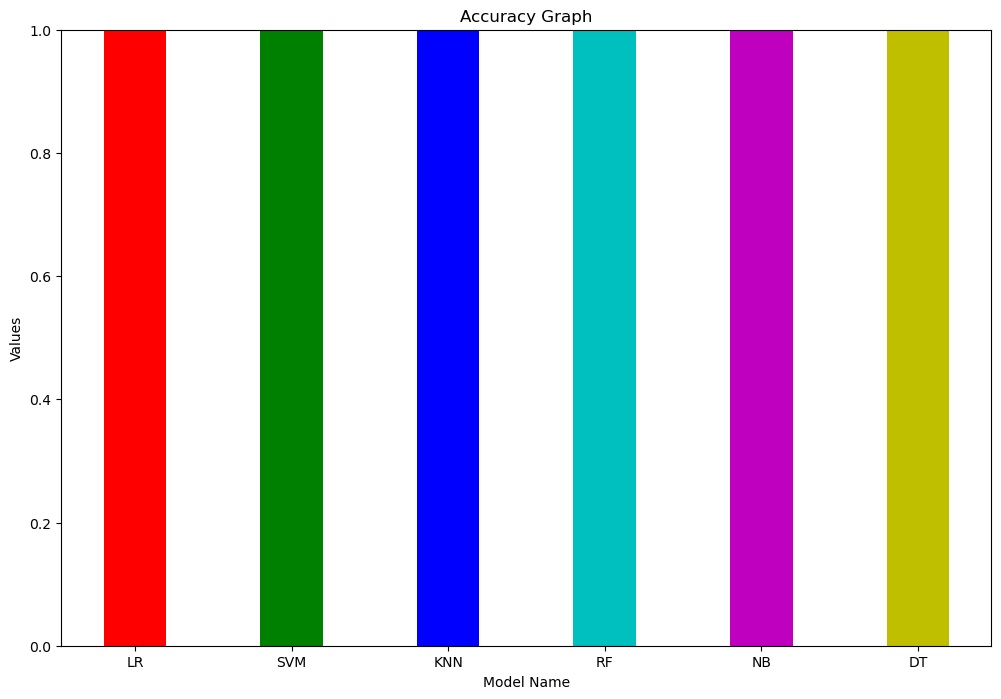

In [349]:
#graph plotting
val = {'LR':acc[0],'SVM':acc[1],'KNN':acc[2],'RF':acc[3],'NB':acc[4],'DT':acc[5]}
model_name = list(val.keys())
values = list(val.values())
plt.figure(figsize=(12, 8))

axes = plt.axes()
axes.set_ylim([0, 1.0])
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('Accuracy Graph')
color = ['r','g','b','c','m','y']
plt.bar(model_name,values,color=color,width = 0.4)
plt.show()
#plt.savefig('Accuracy_bar.jpg')


In [350]:
mod = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','KNN', 'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [
        acc[0],
        acc[1],
        acc[2],
        acc[3],
        acc[4],
        acc[5]
    ]})
mod.sort_values(by='Score', ascending=False)

,Model,Score
2,KNN,0.999001
3,Random Forest,0.999001
4,Naive Bayes,0.999001
5,Decision Tree,0.998236
1,SVM,0.998060
0,Logistic Regression,0.997766


# PRECISION GRAPH

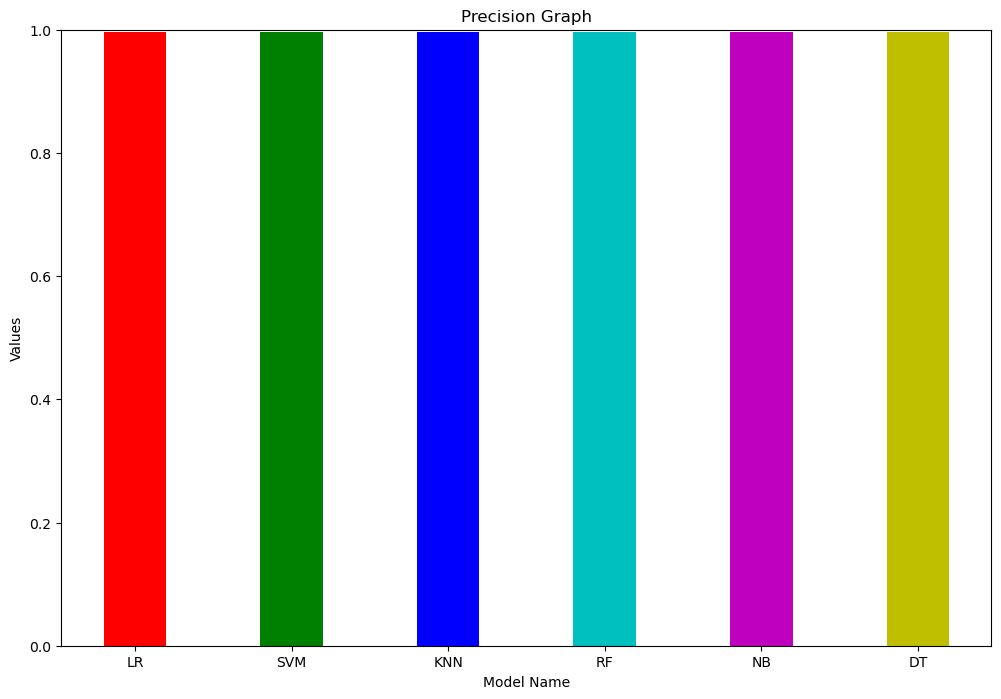

In [352]:
val = {'LR':pre[0].mean(),'SVM':pre[1].mean(),'KNN':pre[2].mean(),'RF':pre[3].mean(),'NB':pre[4].mean(),'DT':pre[5].mean()}
model_name = list(val.keys())
values = list(val.values())

plt.figure(figsize=(12, 8))
axes = plt.axes()
axes.set_ylim([0, 1.0])
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('Precision Graph')
color = ['r','g','b','c','m','y']
plt.bar(model_name,values,color=color,width = 0.4)
plt.show()

In [353]:
mod = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','KNN', 'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [
        pre[0].mean(),
        pre[1].mean(),
        pre[2].mean(),
        pre[3].mean(),
        pre[4].mean(),
        pre[5].mean()
    ]})
mod.sort_values(by='Score', ascending=False)

,Model,Score
1,SVM,0.996374
0,Logistic Regression,0.996369
2,KNN,0.995877
3,Random Forest,0.995877
4,Naive Bayes,0.995877
5,Decision Tree,0.995863


# RECALL GRAPH

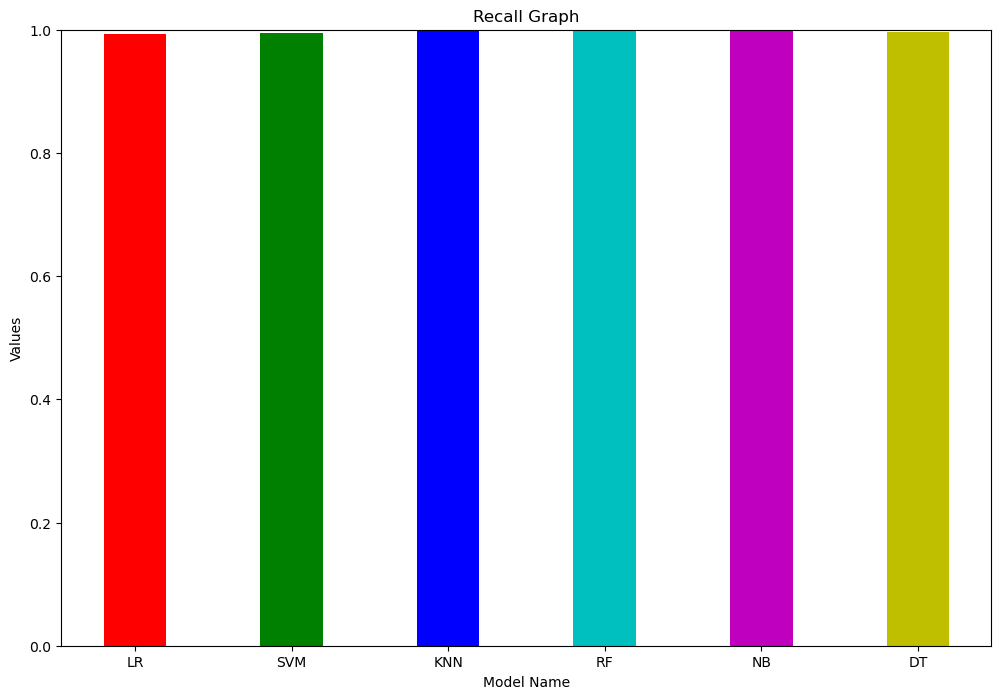

In [355]:
val = {'LR':rec[0].mean(),'SVM':rec[1].mean(),'KNN':rec[2].mean(),'RF':rec[3].mean(),'NB':rec[4].mean(),'DT':rec[5].mean()}
model_name = list(val.keys())
values = list(val.values())

plt.figure(figsize=(12, 8))
axes = plt.axes()
axes.set_ylim([0, 1.0])
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('Recall Graph')
color = ['r','g','b','c','m','y']
plt.bar(model_name,values,color=color,width = 0.4)
plt.show()

In [356]:
mod = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','KNN', 'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [
        rec[0].mean(),
        rec[1].mean(),
        rec[2].mean(),
        rec[3].mean(),
        rec[4].mean(),
        rec[5].mean()
    ]})
mod.sort_values(by='Score', ascending=False)

,Model,Score
2,KNN,0.999741
3,Random Forest,0.999741
4,Naive Bayes,0.999741
5,Decision Tree,0.996379
1,SVM,0.995085
0,Logistic Regression,0.993792


# F1 SCORE GRPAH

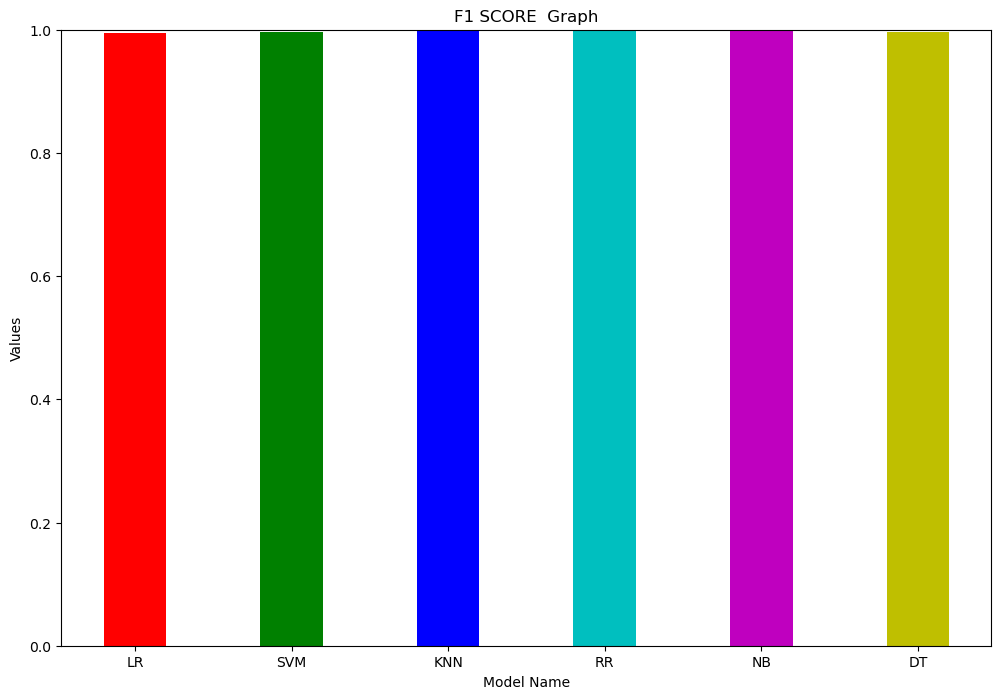

In [358]:
val = {'LR':f1_s[0].mean(),'SVM':f1_s[1].mean(),'KNN':f1_s[2].mean(),'RR':f1_s[3].mean(),'NB':f1_s[4].mean(),'DT':f1_s[5].mean()}
model_name = list(val.keys())
values = list(val.values())

plt.figure(figsize=(12, 8))
axes = plt.axes()
axes.set_ylim([0, 1.0])
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('F1 SCORE  Graph')
color = ['r','g','b','c','m','y']
plt.bar(model_name,values,color=color,width = 0.4)
plt.show()

In [359]:
mod = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','KNN', 'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [
        f1_s[0].mean(),
        f1_s[1].mean(),
        f1_s[2].mean(),
        f1_s[3].mean(),
        f1_s[4].mean(),
        f1_s[5].mean()
    ]})
mod.sort_values(by='Score', ascending=False)

,Model,Score
2,KNN,0.997806
3,Random Forest,0.997806
4,Naive Bayes,0.997806
5,Decision Tree,0.996121
1,SVM,0.995729
0,Logistic Regression,0.995079


# ROC CURVE

In [361]:
def rc_curv():
    for i,model in enumerate(models):
        cr_probs = model.predict_proba(x_test)
        cr_probs = cr_probs[:, 1]
        cr_auc = roc_auc_score(test_y, cr_probs)
        #cr_auc=np.append(cr_auc,cr_auc)
        cr_fpr,cr_tpr, _ = roc_curve(test_y,cr_probs)
        #cr_fpr=np.append(cr_fpr,cr_fpr)
        #cr_tpr=np.append(cr_tpr,cr_tpr)
        plt.figure(figsize=(8, 8))
        print(model)
        print('----------------------------------------------------------------------------------')
        plt.plot(cr_fpr,cr_tpr, marker='*',label='(AUROC = %0.10f)'% cr_auc)
        plt.plot([0, 1], [0, 1],'r--')
        #plt.title('ROC PLOT')
        plt.title(f'ROC Curve for {model.__class__.__name__}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        #plt.savefig('roc_grpah.jpg')
        plt.show()
        print('--------------------------------------------------------------------------------')

LogisticRegression(max_iter=30000)
----------------------------------------------------------------------------------


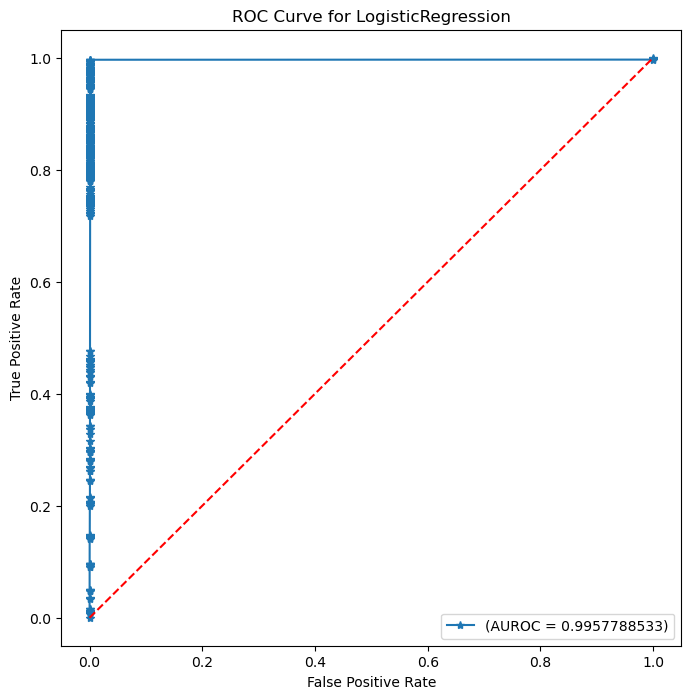

--------------------------------------------------------------------------------
SVC(kernel='linear', probability=True)
----------------------------------------------------------------------------------


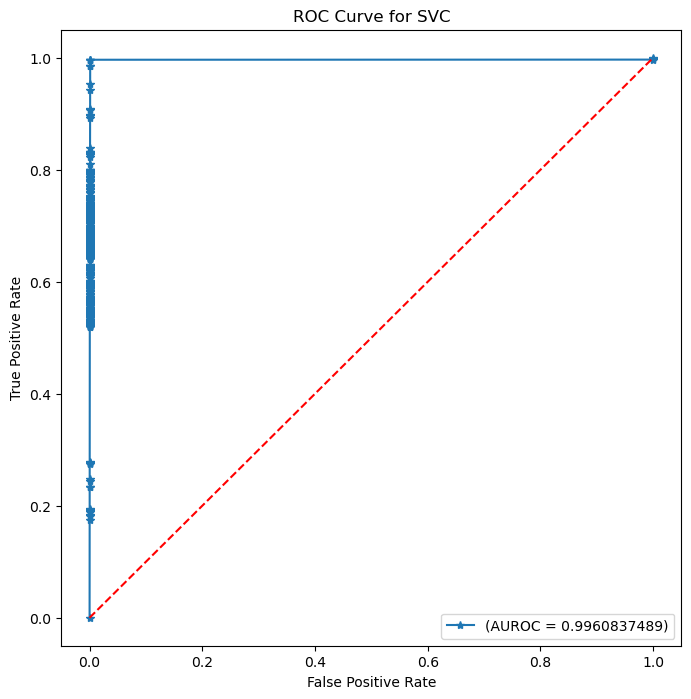

--------------------------------------------------------------------------------
KNeighborsClassifier(n_neighbors=10)
----------------------------------------------------------------------------------


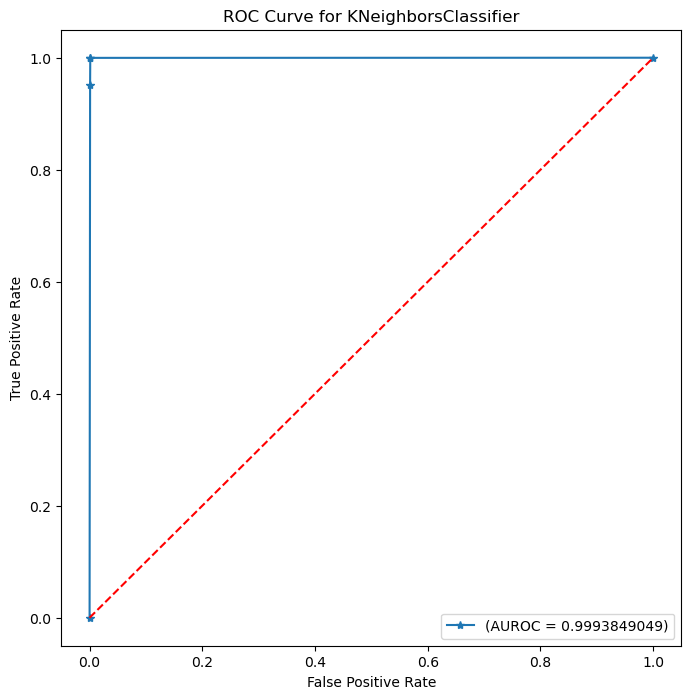

--------------------------------------------------------------------------------
RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, random_state=42)
----------------------------------------------------------------------------------


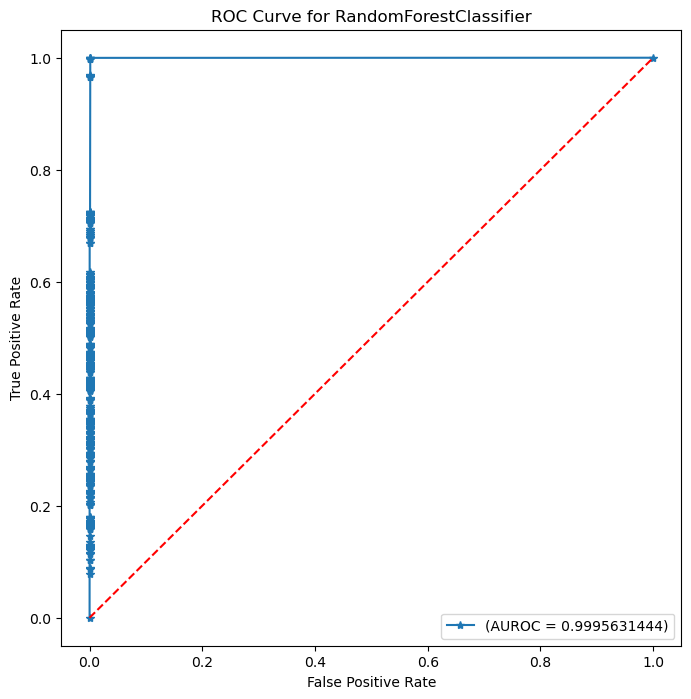

--------------------------------------------------------------------------------
GaussianNB()
----------------------------------------------------------------------------------


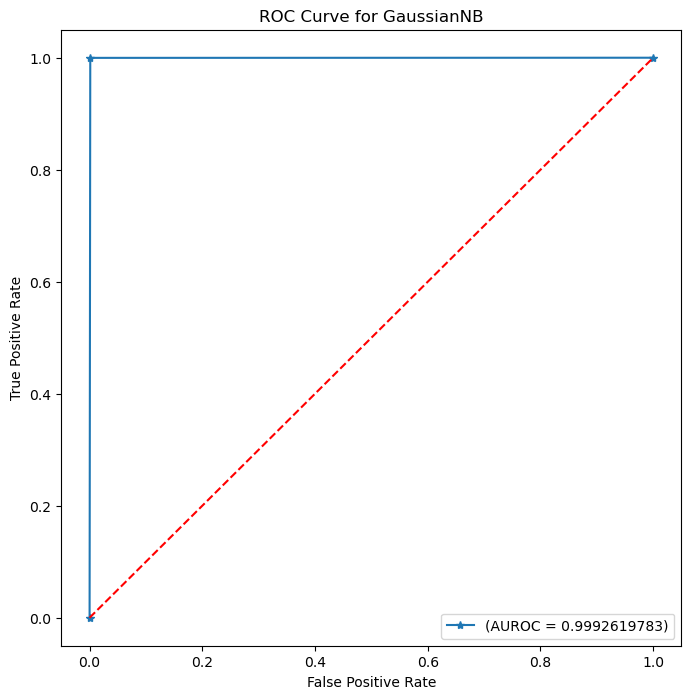

--------------------------------------------------------------------------------
DecisionTreeClassifier()
----------------------------------------------------------------------------------


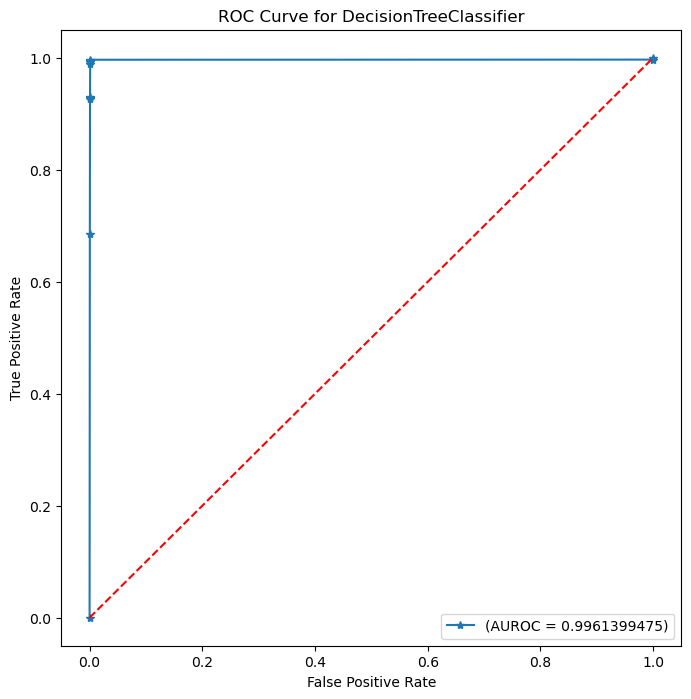

--------------------------------------------------------------------------------


In [362]:
rc_curv()

# COMMON ROC GRPAH

In [364]:
for model in models:
    lr_probs = model.predict_proba(x_test)
    sv_probs = model.predict_proba(x_test)
    kn_probs = model.predict_proba(x_test)
    rf_probs = model.predict_proba(x_test)
    nb_probs = model.predict_proba(x_test)
    dt_probs = model.predict_proba(x_test)

In [365]:
#Probabilities for the positive outcome is kept.
lr_probs = lr_probs[:, 1]
sv_probs = sv_probs[:, 1]
rf_probs = rf_probs[:, 1]
kn_probs = kn_probs[:, 1]
nb_probs = nb_probs[:, 1]
dt_probs = dt_probs[:, 1]

In [366]:
lr_auc = roc_auc_score(test_y, lr_probs)
rf_auc = roc_auc_score(test_y, rf_probs)
nb_auc = roc_auc_score(test_y, nb_probs)
sv_auc = roc_auc_score(test_y, sv_probs)
kn_auc = roc_auc_score(test_y, kn_probs)
dt_auc = roc_auc_score(test_y, dt_probs)

In [367]:
#printing AUROC  scores
print('Logistic : AUROC = %.10f' % (lr_auc))
print('SVM : AUROC = %.10f' % (sv_auc))
print('Random Forest: AUROC = %.10f' % (rf_auc))
print('KNN : AUROC = %.10f' % (kn_auc))
print('Naive Bayes: AUROC = %.10f' % (nb_auc))
print('Decision Tree: AUROC = %.10f' % (dt_auc))

Logistic : AUROC = 0.9961399475
SVM : AUROC = 0.9961399475
Random Forest: AUROC = 0.9961399475
KNN : AUROC = 0.9961399475
Naive Bayes: AUROC = 0.9961399475
Decision Tree: AUROC = 0.9961399475


In [368]:
#Calculate ROC curve
lr_fpr,lr_tpr, _ = roc_curve(test_y,lr_probs)
sv_fpr,sv_tpr, _ =  roc_curve(test_y, sv_probs)
rf_fpr, rf_tpr, _ = roc_curve(test_y, rf_probs)
kn_fpr,kn_tpr, _ = roc_curve(test_y, kn_probs)
nb_fpr, nb_tpr, _ = roc_curve(test_y, nb_probs)
dt_fpr, dt_tpr, _ = roc_curve(test_y, dt_probs)

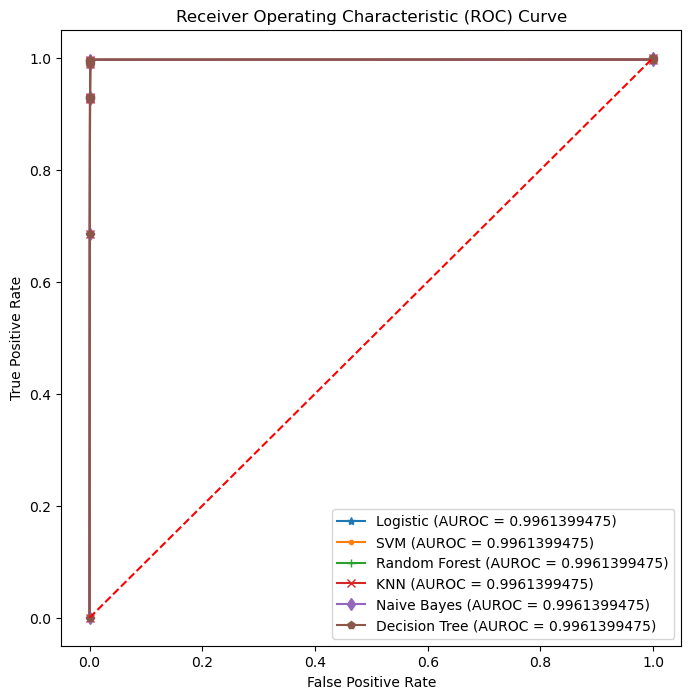

In [369]:
#plotting the diagram
plt.figure(figsize=(8, 8))
plt.plot(lr_fpr,lr_tpr, marker='*', label='Logistic (AUROC = %0.10f)' % lr_auc)
plt.plot(sv_fpr,sv_tpr, marker='.', label='SVM (AUROC = %0.10f)' % sv_auc)
plt.plot(rf_fpr, rf_tpr, marker='+', label='Random Forest (AUROC = %0.10f)' % rf_auc)
plt.plot(kn_fpr,kn_tpr, marker='x', label='KNN (AUROC = %0.10f)' % kn_auc)
plt.plot(nb_fpr, nb_tpr, marker='d', label='Naive Bayes (AUROC = %0.10f)' % nb_auc)
plt.plot(dt_fpr, dt_tpr, marker='p', label='Decision Tree (AUROC = %0.10f)' % dt_auc)

plt.plot([0, 1], [0, 1],'r--')
#plt.title('TESTING ROC PLOT')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
#plt.savefig('roc_grpah.jpg')
plt.show()

Tval is for taining data and other is for test data.

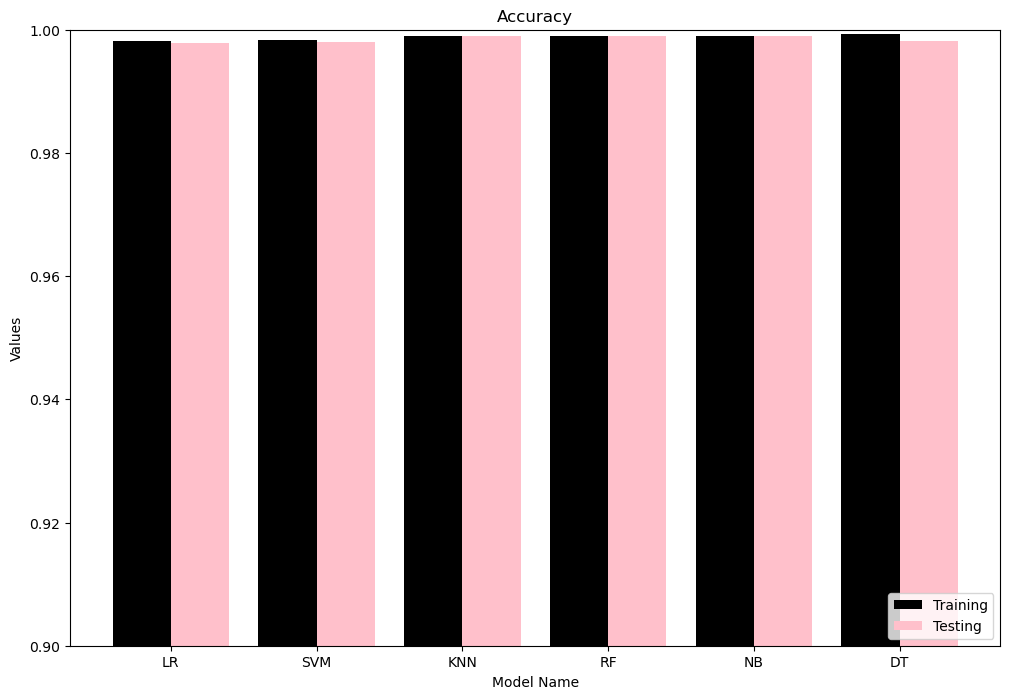

In [371]:
tval = {'LR':tacc[0],'SVM':tacc[1],'KNN':tacc[2],'RF':tacc[3],'NB':tacc[4],'DT':tacc[5]}
val = {'LR':acc[0],'SVM':acc[1],'KNN':acc[2],'RF':acc[3],'NB':acc[4],'DT':acc[5]}
model_name = list(val.keys())
train_values = list(tval.values())
test_values = list(val.values())

plt.figure(figsize=(12, 8))

axes = plt.axes()
axes.set_ylim([0.90, 1.0])

x_axis = np.arange(len(model_name))

plt.xticks(x_axis, model_name)
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('Accuracy')

plt.bar(x_axis -0.2,train_values,0.4,label = 'Training', color='black')
plt.bar(x_axis + 0.2,test_values,0.4,label = 'Testing', color='pink')
plt.legend(loc ='lower right')
plt.savefig("acc.png",dpi = 300)
plt.show()

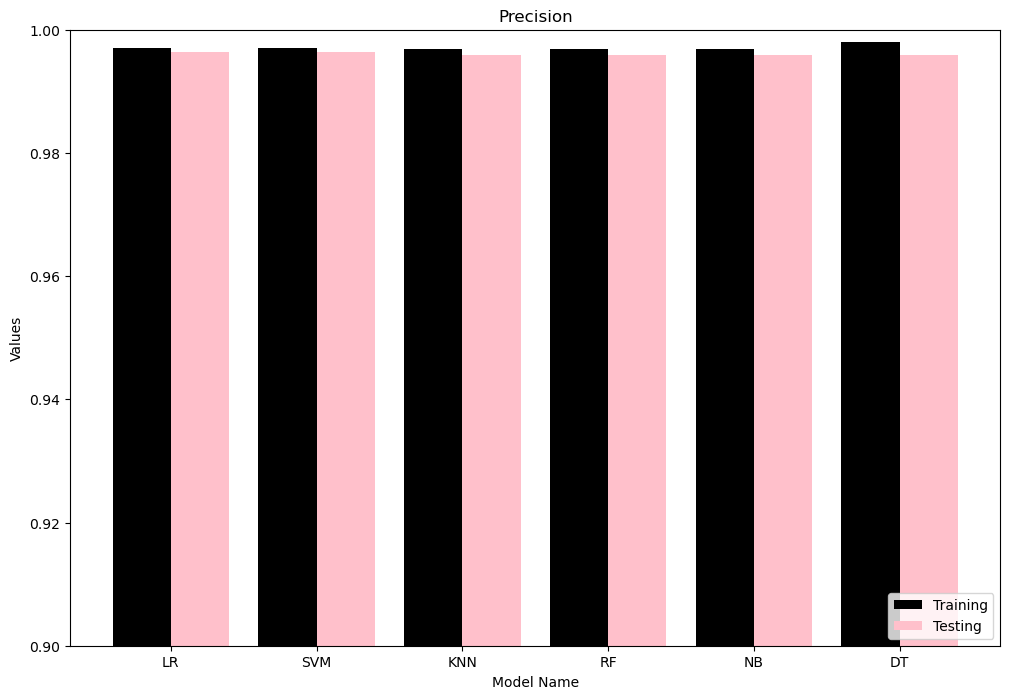

In [372]:
tval = {'LR':tprec[0].mean(),'SVM':tprec[1].mean(),'KNN':tprec[2].mean(),'RF':tprec[3].mean(),'NB':tprec[4].mean(),'DT':tprec[5].mean()}
val = {'LR':pre[0].mean(),'SVM':pre[1].mean(),'KNN':pre[2].mean(),'RF':pre[3].mean(),'NB':pre[4].mean(),'DT':pre[5].mean()}
model_name = list(val.keys())
train_values = list(tval.values())
test_values = list(val.values())

plt.figure(figsize=(12, 8))

axes = plt.axes()
axes.set_ylim([0.90, 1.0])

x_axis = np.arange(len(model_name))

plt.xticks(x_axis, model_name)
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('Precision')

plt.bar(x_axis -0.2,train_values,0.4,label = 'Training', color='black')
plt.bar(x_axis + 0.2,test_values,0.4,label = 'Testing', color='pink')
plt.legend(loc ='lower right')
plt.savefig("pre.png",dpi = 300)
plt.show()

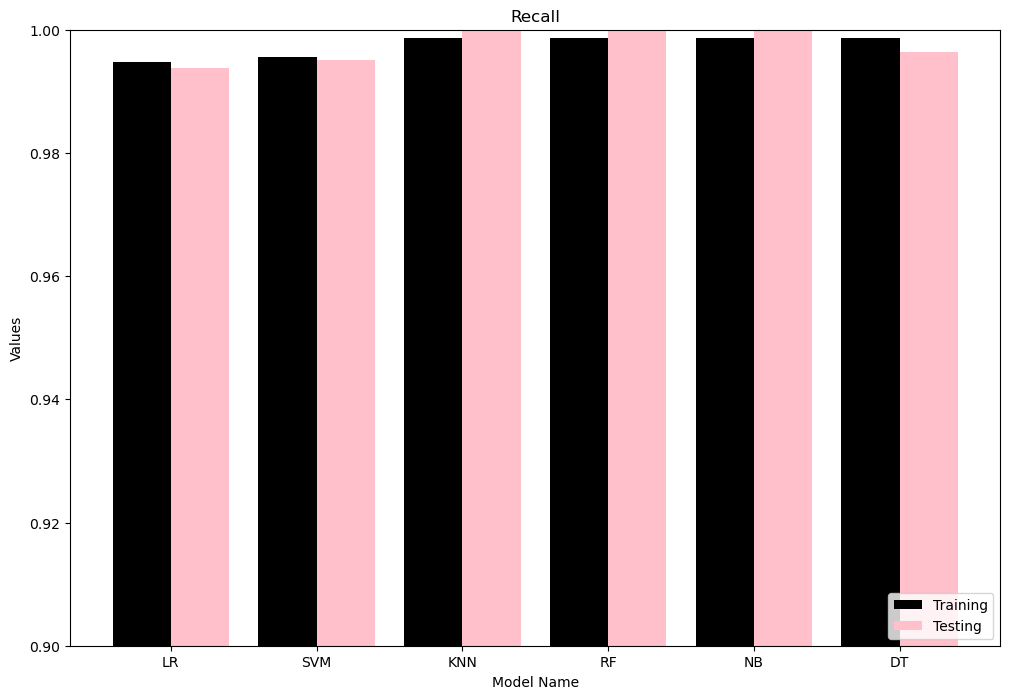

In [373]:
tval = {'LR':trec[0].mean(),'SVM':trec[1].mean(),'KNN':trec[2].mean(),'RF':trec[3].mean(),'NB':trec[4].mean(),'DT':trec[5].mean()}
val = {'LR':rec[0].mean(),'SVM':rec[1].mean(),'KNN':rec[2].mean(),'RF':rec[3].mean(),'NB':rec[4].mean(),'DT':rec[5].mean()}
model_name = list(val.keys())
train_values = list(tval.values())
test_values = list(val.values())

plt.figure(figsize=(12, 8))


axes = plt.axes()
axes.set_ylim([0.90, 1.0])

x_axis = np.arange(len(model_name))

plt.xticks(x_axis, model_name)
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('Recall')

plt.bar(x_axis -0.2,train_values,0.4,label = 'Training', color='black')
plt.bar(x_axis + 0.2,test_values,0.4,label = 'Testing', color='pink')
plt.legend(loc ='lower right')
plt.savefig("rec.png",dpi = 300)
plt.show()

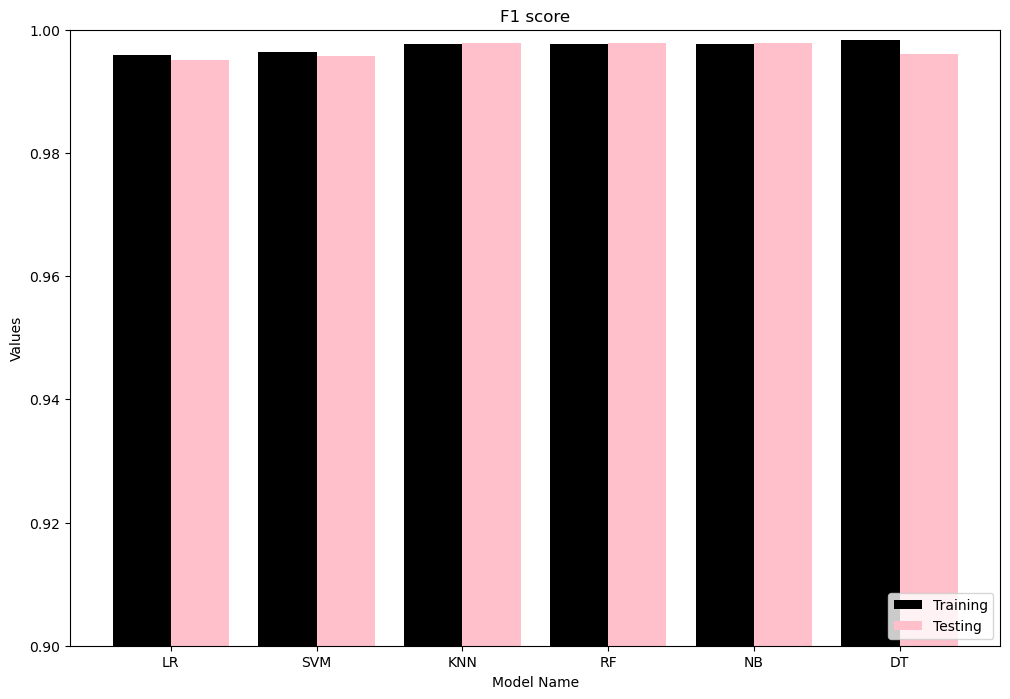

In [374]:
tval = {'LR':tf1[0].mean(),'SVM':tf1[1].mean(),'KNN':tf1[2].mean(),'RF':tf1[3].mean(),'NB':tf1[4].mean(),'DT':tf1[5].mean()}
val = {'LR':f1_s[0].mean(),'SVM':f1_s[1].mean(),'KNN':f1_s[2].mean(),'RF':f1_s[3].mean(),'NB':f1_s[4].mean(),'DT':f1_s[5].mean()}
model_name = list(val.keys())
train_values = list(tval.values())
test_values = list(val.values())
plt.figure(figsize=(12, 8))

axes = plt.axes()
axes.set_ylim([0.90, 1.0])

x_axis = np.arange(len(model_name))

plt.xticks(x_axis, model_name)
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('F1 score')

plt.bar(x_axis -0.2,train_values,0.4,label = 'Training', color='black')
plt.bar(x_axis + 0.2,test_values,0.4,label = 'Testing', color='pink')
plt.legend(loc ='lower right')
plt.savefig("F1 score Graph.png",dpi = 300)
plt.show()